<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Overview:" data-toc-modified-id="Project-Overview:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Overview:</a></span></li><li><span><a href="#Obtain-Data-/-Import-Libraries" data-toc-modified-id="Obtain-Data-/-Import-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Obtain Data / Import Libraries</a></span><ul class="toc-item"><li><span><a href="#Provided-ERD-for-Northwind-Co:" data-toc-modified-id="Provided-ERD-for-Northwind-Co:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Provided ERD for Northwind Co:</a></span></li></ul></li><li><span><a href="#Pre-Process/Scrub-Data" data-toc-modified-id="Pre-Process/Scrub-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pre-Process/Scrub Data</a></span></li><li><span><a href="#Data-Exploration/Analysis:" data-toc-modified-id="Data-Exploration/Analysis:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration/Analysis:</a></span><ul class="toc-item"><li><span><a href="#Do-discounts-have-a-statistically-significant-effect-on-the-number-of-products-customers-order?-If-so,-at-what-level(s)-of-discount?" data-toc-modified-id="Do-discounts-have-a-statistically-significant-effect-on-the-number-of-products-customers-order?-If-so,-at-what-level(s)-of-discount?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?</a></span></li><li><span><a href="#Do-discounts-have-a-statistically-significant-effect-on-customer-spend-per-order?-If-so,-at-what-level(s)-of-discount?" data-toc-modified-id="Do-discounts-have-a-statistically-significant-effect-on-customer-spend-per-order?-If-so,-at-what-level(s)-of-discount?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Do discounts have a statistically significant effect on customer spend per order? If so, at what level(s) of discount?</a></span></li><li><span><a href="#Do-discounts-have-a-statistically-significant-effect-on-Order-Quantity-by-Category?-If-so,-at-what-level(s)-of-discount?" data-toc-modified-id="Do-discounts-have-a-statistically-significant-effect-on-Order-Quantity-by-Category?-If-so,-at-what-level(s)-of-discount?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Do discounts have a statistically significant effect on Order Quantity by Category? If so, at what level(s) of discount?</a></span></li><li><span><a href="#Is-there-a-statistically-significant-difference-in-performance-of-Sales-Employees-at-Northwind?" data-toc-modified-id="Is-there-a-statistically-significant-difference-in-performance-of-Sales-Employees-at-Northwind?-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Is there a statistically significant difference in performance of Sales Employees at Northwind?</a></span></li><li><span><a href="#YoY-Revenue:" data-toc-modified-id="YoY-Revenue:-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>YoY Revenue:</a></span></li></ul></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Recommendations</a></span><ul class="toc-item"><li><span><a href="#Additional-Future-Experiments:" data-toc-modified-id="Additional-Future-Experiments:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Additional Future Experiments:</a></span></li></ul></li></ul></div>

**Northwind Co: Company Sales Analysis**
<br>
Flatiron Module 2 Project: 
<br>
Paul Woody

![Paul](Paul.jpeg)

# Project Overview:
For this project, we'll be exploring the data provided by our client, Northwind, containing companywide sales data for a range of products.  Our goal is to derive the significance of discounts on overall sales as well as to provide the client with additional business recommendations based on the results of EDA. 

To complete our analysis, we will follow the OSEMN Data Science process as outlined [here](http://www.dataists.com/tag/osemn/).

1. Obtain Data
    - Load dataset provided by client
2. Pre-Process/Scrub Data
    - Ensure that missing values are handled appropriately
    - Ensure that all data is cast to the correct dtype, and that any non-sensical datapoints are scrubbed or dropped from our dataset.
3. Explore Data
    - Cluster, visualize, and view correlations between features in the dataset 
    - Identify the aims of the project in the form of clearly articulated business questions
4. Hypothesis Testing
    - Utilize hypothesis testing to evaluate the results questions posed in the data exploration phase.
    - Utilize various statistical methodologies to evaluate significace of results
5. Interpret, Review Results
    - Using the results of hypothesis/significance testing, evaluate the business questions posed in Step 3
    - Articulate business recommendations based on the results of testing at appropriate confidence intervals
    - Identify potential improvements or factors that may skew the obtained results 
    - Identify suggested next steps for client

# Obtain Data / Import Libraries

In [1]:
# Importing Libraries to process/analyze data:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker
import numpy as np
from sqlalchemy import MetaData
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pprint
from collections import Counter
import itertools
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

#import warnings
#warnings.filterwarnings("ignore")

**Provided ERD for Northwind Co:**
![Northwind ERD](Northwind_ERD.png)

In [2]:
## Defining Functions:

# Calculate Population Mean:
def calculate_mu(x):
    mu = float(sum(x.values)/len(x))
    return mu

# Generating normally distributed KDE:
def KDE_gen(mu, sigma, n):
    x = np.random.normal(mu,sigma,n)
    return x

# Compare average by discount as bool:
def results_printer(a, b):
    print(f'Avg with discount: {round(a, 2)}')
    print(f'Avg with no discount: {round(b, 2)}')
    print(f'Effect Size: {round((a-b),2)}')
    print(f'Relative effect size: {round((a-b)/b,2)}')
    
    
def results_printer_disc(a, b):
    print(f'Avg at current discount level: {round(a, 2)}')
    print(f'Effect Size: {round((a-b),2)}')
    print(f'Relative effect size: {round((a-b)/b,2)}')
    
# Calculate variance ratio for 2 samples:    
def variance_ratio(a,b):
    return np.var(a)/np.var(b)

# Creating Function to give information for each column in a table:
def get_column_info(table):
    cols_list = inspector.get_columns(table)
    print('')
    print('------------------------------------------------------------------------')
    print(f'Table Name: {table}, Primary Key: {inspector.get_primary_keys(table)}')
    print('------------------------------------------------------------------------')
    print('')
    for column in cols_list:
        print(f"Column Name: {column['name']}, Column Type: {column['type']}")
              
def order_cost_calc(discount_list, unitprice_list, quantity_list, new_list=[]):
    for i in range(len(discount_list)):
        if discount_list[i] == 0:
            new_list.append((unitprice_list[i] * quantity_list[i]))
        else:
            new_list.append(unitprice_list[i] * quantity_list[i] * (1-discount_list[i]))
    return new_list

In [3]:
# Creating engine and binding to target database:
engine = create_engine("sqlite:///Northwind_small.sqlite", echo=True)
Session = sessionmaker(bind=engine)
session = Session()

In [4]:
from sqlalchemy import inspect
inspector = inspect(engine)

# Viewing Table Names to compare with ERD:
print(inspector.get_table_names())

2019-06-24 21:24:27,386 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-06-24 21:24:27,387 INFO sqlalchemy.engine.base.Engine ()
2019-06-24 21:24:27,389 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-06-24 21:24:27,391 INFO sqlalchemy.engine.base.Engine ()
2019-06-24 21:24:27,393 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-06-24 21:24:27,394 INFO sqlalchemy.engine.base.Engine ()
['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


As demonstrated by the output of table names above, there are many discrepancies between the Table/Column names in the provided ERD and in the actual database. In order to successfully scrub/explore the dataset, we must first verify the table/column names in our database, as well as account for missing values and improperly stored dtypes.

In [174]:
# Using above function to iterate over all tables:
tables = inspector.get_table_names()
for table in tables:
    print(get_column_info(table))


------------------------------------------------------------------------
Table Name: Category, Primary Key: ['Id']
------------------------------------------------------------------------

Column Name: Id, Column Type: INTEGER
Column Name: CategoryName, Column Type: VARCHAR(8000)
Column Name: Description, Column Type: VARCHAR(8000)
None

------------------------------------------------------------------------
Table Name: Customer, Primary Key: ['Id']
------------------------------------------------------------------------

Column Name: Id, Column Type: VARCHAR(8000)
Column Name: CompanyName, Column Type: VARCHAR(8000)
Column Name: ContactName, Column Type: VARCHAR(8000)
Column Name: ContactTitle, Column Type: VARCHAR(8000)
Column Name: Address, Column Type: VARCHAR(8000)
Column Name: City, Column Type: VARCHAR(8000)
Column Name: Region, Column Type: VARCHAR(8000)
Column Name: PostalCode, Column Type: VARCHAR(8000)
Column Name: Country, Column Type: VARCHAR(8000)
Column Name: Phone, Co

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:35: SADeprecationWarning: The Inspector.get_primary_keys() method is deprecated and will be removed in a future release.  Please refer to the Inspector.get_pk_constraint() method.


In [6]:
# Creating DataFrames for each table in the Northwind Database:
df_category = pd.read_sql_query("SELECT * FROM Category", engine)
df_customer = pd.read_sql_query("SELECT * FROM Customer", engine)
df_customercustomerdemo = pd.read_sql_query("SELECT * FROM CustomerCustomerDemo", engine)
df_customerdemographic = pd.read_sql_query("SELECT * FROM CustomerDemographic", engine)
df_employee = pd.read_sql_query("SELECT * FROM Employee", engine)
df_employeeterritory = pd.read_sql_query("SELECT * FROM EmployeeTerritory", engine)
df_order = pd.read_sql_query("SELECT * FROM 'Order'", engine)
df_orderdetail = pd.read_sql_query("SELECT * FROM OrderDetail", engine)
df_product = pd.read_sql_query("SELECT * FROM Product", engine)
df_region = pd.read_sql_query("SELECT * FROM Region", engine)
df_shipper = pd.read_sql_query("SELECT * FROM Shipper", engine)
df_supplier = pd.read_sql_query("SELECT * FROM Supplier", engine)
df_territory = pd.read_sql_query("SELECT * FROM Territory", engine)

2019-06-24 21:24:27,516 INFO sqlalchemy.engine.base.Engine SELECT * FROM Category
2019-06-24 21:24:27,517 INFO sqlalchemy.engine.base.Engine ()
2019-06-24 21:24:27,520 INFO sqlalchemy.engine.base.Engine SELECT * FROM Customer
2019-06-24 21:24:27,522 INFO sqlalchemy.engine.base.Engine ()
2019-06-24 21:24:27,527 INFO sqlalchemy.engine.base.Engine SELECT * FROM CustomerCustomerDemo
2019-06-24 21:24:27,527 INFO sqlalchemy.engine.base.Engine ()
2019-06-24 21:24:27,531 INFO sqlalchemy.engine.base.Engine SELECT * FROM CustomerDemographic
2019-06-24 21:24:27,532 INFO sqlalchemy.engine.base.Engine ()
2019-06-24 21:24:27,534 INFO sqlalchemy.engine.base.Engine SELECT * FROM Employee
2019-06-24 21:24:27,535 INFO sqlalchemy.engine.base.Engine ()
2019-06-24 21:24:27,540 INFO sqlalchemy.engine.base.Engine SELECT * FROM EmployeeTerritory
2019-06-24 21:24:27,541 INFO sqlalchemy.engine.base.Engine ()
2019-06-24 21:24:27,546 INFO sqlalchemy.engine.base.Engine SELECT * FROM 'Order'
2019-06-24 21:24:27,547

# Pre-Process/Scrub Data

Now that the dataset has been loaded, we should familiarize ourselves with Northwind and what they do as a company prior to forming specific inquiries and queries. For each table in the Northwind Database, we'll preview the contents, properly account for null values, and ensure that column data is stored in the proper format prior to hypothesis testing.

**Category Table Scrubbing:**

In [7]:
# Viewing Category Table:
df_category.head(3)

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"


In [8]:
print(df_category.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
Id              8 non-null int64
CategoryName    8 non-null object
Description     8 non-null object
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes
None


In [9]:
# Checking for Null Values:
df_category.isna().sum()

Id              0
CategoryName    0
Description     0
dtype: int64

In [10]:
# Visualizing Category Names:
df_category.groupby(['CategoryName']).head(10)

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


Based on the contents of the Category Table, we can reasonably conclude that Northwind is a Food & Beverage Distributor. We may choose to explore sales perfomance by Category in our exploratory data analysis, but for now, let's get a better idea of the products sold by Northwind.

**Product Table Scrubbing:**

Now that we have a broad idea of what Northwind does, let's peruse the products they sell.

In [11]:
# Reviewing Product DataFrame:
df_product.head(3)

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.0,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0,13,70,25,0


In [12]:
# Reviewing the products NorthWind carries:
print(len(df_product.ProductName))
df_product.ProductName.unique()

77


array(['Chai', 'Chang', 'Aniseed Syrup', "Chef Anton's Cajun Seasoning",
       "Chef Anton's Gumbo Mix", "Grandma's Boysenberry Spread",
       "Uncle Bob's Organic Dried Pears", 'Northwoods Cranberry Sauce',
       'Mishi Kobe Niku', 'Ikura', 'Queso Cabrales',
       'Queso Manchego La Pastora', 'Konbu', 'Tofu', 'Genen Shouyu',
       'Pavlova', 'Alice Mutton', 'Carnarvon Tigers',
       'Teatime Chocolate Biscuits', "Sir Rodney's Marmalade",
       "Sir Rodney's Scones", "Gustaf's Knäckebröd", 'Tunnbröd',
       'Guaraná Fantástica', 'NuNuCa Nuß-Nougat-Creme',
       'Gumbär Gummibärchen', 'Schoggi Schokolade', 'Rössle Sauerkraut',
       'Thüringer Rostbratwurst', 'Nord-Ost Matjeshering',
       'Gorgonzola Telino', 'Mascarpone Fabioli', 'Geitost',
       'Sasquatch Ale', 'Steeleye Stout', 'Inlagd Sill', 'Gravad lax',
       'Côte de Blaye', 'Chartreuse verte', 'Boston Crab Meat',
       "Jack's New England Clam Chowder", 'Singaporean Hokkien Fried Mee',
       'Ipoh Coffee', 'Gula

In [13]:
# Viewing number of "Discontinued" Products:
df_product.Discontinued.value_counts()

0    69
1     8
Name: Discontinued, dtype: int64

As seen above, Northwind carries a total of 77 products.

For the purposes of our analysis, we will ignore the presence of Discontinued Products, including them in our analysis. Should we find that specific Discontinued products perform as good as or better than other products in the dataset, we may recommend that Northwind choose to restock these products.

In a future project, Northwind may also consider investigating the sales performance of specific products on a regional or national level to maximize product performance by region, reduce shipping costs, and reduce shrink through supply chain optimization.

**Customer Table Scrubbing:**

After defining what it is Northwind does, we should next explore Northwind's customer dataset. Is Northwind a local distributor? Where are Northwind's customers located? Is Northwind's target demographic clear?

Reviewing the data to answer some of the questions above should give us insight into potential pitfalls faced by Northwind as well as to guide the scope of our inquiry. Based on differences in regional sales performance, it may be prudent to prioritize expansion in a particular region, change marketing strategies (such as discounts) in specific regions, or hire additional employees.

In [14]:
# Viewing Customer DataFrame:
df_customer.head(3)

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None


In [15]:
# Determining Presence of null values:
print(df_customer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 11 columns):
Id              91 non-null object
CompanyName     91 non-null object
ContactName     91 non-null object
ContactTitle    91 non-null object
Address         91 non-null object
City            91 non-null object
Region          91 non-null object
PostalCode      90 non-null object
Country         91 non-null object
Phone           91 non-null object
Fax             69 non-null object
dtypes: object(11)
memory usage: 7.9+ KB
None


In [16]:
df_customer.head(3)

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None


In [17]:
# Reviewing the names of Northwind's customers:
df_customer.CompanyName.unique()

array(['Alfreds Futterkiste', 'Ana Trujillo Emparedados y helados',
       'Antonio Moreno Taquería', 'Around the Horn', 'Berglunds snabbköp',
       'Blauer See Delikatessen', 'Blondesddsl père et fils',
       'Bólido Comidas preparadas', 'Bon app', 'Bottom-Dollar Markets',
       "B's Beverages", 'Cactus Comidas para llevar',
       'Centro comercial Moctezuma', 'Chop-suey Chinese',
       'Comércio Mineiro', 'Consolidated Holdings',
       'Drachenblut Delikatessen', 'Du monde entier',
       'Eastern Connection', 'Ernst Handel', 'Familia Arquibaldo',
       'FISSA Fabrica Inter. Salchichas S.A.', 'Folies gourmandes',
       'Folk och fä HB', 'Frankenversand', 'France restauration',
       'Franchi S.p.A.', 'Furia Bacalhau e Frutos do Mar',
       'Galería del gastrónomo', 'Godos Cocina Típica',
       'Gourmet Lanchonetes', 'Great Lakes Food Market',
       'GROSELLA-Restaurante', 'Hanari Carnes', 'HILARION-Abastos',
       'Hungry Coyote Import Store', 'Hungry Owl All-Night Groce

In [18]:
df_customer_demo = df_customer.groupby(['Region'])['CompanyName'].count()
df_customer_demo.head()

Region
British Isles       8
Central America     5
Eastern Europe      1
North America      16
Northern Europe     4
Name: CompanyName, dtype: int64

In [19]:
df_customer_demo_country = df_customer.groupby(['Country'])['CompanyName'].count()
print(len(df_customer_demo_country))
df_customer_demo_country

21


Country
Argentina       3
Austria         2
Belgium         2
Brazil          9
Canada          3
Denmark         2
Finland         2
France         11
Germany        11
Ireland         1
Italy           3
Mexico          5
Norway          1
Poland          1
Portugal        2
Spain           5
Sweden          2
Switzerland     2
UK              7
USA            13
Venezuela       4
Name: CompanyName, dtype: int64

Based on their customer demographics, it is evident that Northwind operates internationally, with customers in 21 different countries. The USA, France, and Germany contain the highest number of Northwind customers, with 13, 11, and 11 respectively. 

Regionally, North American contains the highest number of Northwind customers with a total of 16. Should we choose to evaluate sales performance at a national level, we should ensure that sample sizes are large enough to provide meaningful analysis. For this reason, it may be prudent to first explore trends at the regional level.

Should we choose to explore regional sales performance in our EDA, we may also consider grouping smaller 'sub-regions' such as Northern/Eastern Europe to increase sample sizes.

Should Northwind continue to expand in some of the "smaller" countries with less customers, Northwind may wish to investigate sales performance at a National level in a future experiment.

In [20]:
# Dropping the 'Fax' column:
df_customer.drop(['Fax'], axis=1, inplace=True)

In [21]:
# Replacing missing values:
df_customer.PostalCode.fillna('0', inplace=True)

In [22]:
# Re-reviewing Customer DataFrame:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 10 columns):
Id              91 non-null object
CompanyName     91 non-null object
ContactName     91 non-null object
ContactTitle    91 non-null object
Address         91 non-null object
City            91 non-null object
Region          91 non-null object
PostalCode      91 non-null object
Country         91 non-null object
Phone           91 non-null object
dtypes: object(10)
memory usage: 7.2+ KB


In [23]:
# Viewing Unique Values for ContactTitle:
df_customer.ContactTitle.unique()
# We can also consider exploring purchasing trends between department or seniority within a company:

array(['Sales Representative', 'Owner', 'Order Administrator',
       'Marketing Manager', 'Accounting Manager', 'Sales Agent',
       'Sales Associate', 'Sales Manager', 'Marketing Assistant',
       'Assistant Sales Agent', 'Assistant Sales Representative',
       'Owner/Marketing Assistant'], dtype=object)

**CustomerCustomerDemo Table Scrubbing:**

In [24]:
print(df_customercustomerdemo.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
Id                0 non-null object
CustomerTypeId    0 non-null object
dtypes: object(2)
memory usage: 0.0+ bytes
None


**CustomerDemographic Table Scrubbing:**

In [25]:
print(df_customerdemographic.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
Id              0 non-null object
CustomerDesc    0 non-null object
dtypes: object(2)
memory usage: 0.0+ bytes
None


**Employee Table Scrubbing:**

In [26]:
# Reviewing Employee DataFrame:
df_employee.head(3)

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp


In [27]:
df_employee_names = df_employee.groupby(['FirstName', 'LastName'])['FirstName', 'LastName', 'Region', 'Country', 'City', 'HireDate']
df_employee_names.head(10)

,FirstName,LastName,Region,Country,City,HireDate
0,Nancy,Davolio,North America,USA,Seattle,2024-05-01
1,Andrew,Fuller,North America,USA,Tacoma,2024-08-14
2,Janet,Leverling,North America,USA,Kirkland,2024-04-01
3,Margaret,Peacock,North America,USA,Redmond,2025-05-03
4,Steven,Buchanan,British Isles,UK,London,2025-10-17
5,Michael,Suyama,British Isles,UK,London,2025-10-17
6,Robert,King,British Isles,UK,London,2026-01-02
7,Laura,Callahan,North America,USA,Seattle,2026-03-05
8,Anne,Dodsworth,British Isles,UK,London,2026-11-15


As seen above, Northwind has a total of 9 employees and offices in the Seattle area and London. In our EDA, we may choose to compare sales performance between the Seattle and London offices. However, from the data above, we can determine that employees are making international sales and are likely assigned a specific territory.

In [28]:
# Filling in null values with column mode:
df_employee.ReportsTo.fillna(2.0, inplace=True)

In [29]:
# Re-reviewing Employee DataFrame
df_employee.head(3)

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,2.0,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp


In [30]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
Id                 9 non-null int64
LastName           9 non-null object
FirstName          9 non-null object
Title              9 non-null object
TitleOfCourtesy    9 non-null object
BirthDate          9 non-null object
HireDate           9 non-null object
Address            9 non-null object
City               9 non-null object
Region             9 non-null object
PostalCode         9 non-null object
Country            9 non-null object
HomePhone          9 non-null object
Extension          9 non-null object
Photo              0 non-null object
Notes              9 non-null object
ReportsTo          9 non-null float64
PhotoPath          9 non-null object
dtypes: float64(1), int64(1), object(16)
memory usage: 1.3+ KB


**Territory, EmployeeTerritory, and Region Table Scrubbing:**

In [31]:
# Reviewing EmployeeTerritory DataFrame:
print(df_employeeterritory.info())
df_employeeterritory.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
Id             49 non-null object
EmployeeId     49 non-null int64
TerritoryId    49 non-null object
dtypes: int64(1), object(2)
memory usage: 1.2+ KB
None


,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581


In [32]:
# Reviewing Territory DataFrame:
print(df_territory.info())
df_territory.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
Id                      53 non-null object
TerritoryDescription    53 non-null object
RegionId                53 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None


,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1


In [33]:
# Reviewing Region DataFrame:
print(df_region.info())
df_region.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
Id                   4 non-null int64
RegionDescription    4 non-null object
dtypes: int64(1), object(1)
memory usage: 144.0+ bytes
None


,Id,RegionDescription
0,1,Eastern
1,2,Western
2,3,Northern


In [34]:
print(inspector.get_pk_constraint('Territory'))
print(inspector.get_pk_constraint('EmployeeTerritory'))
print(inspector.get_pk_constraint('Region'))

{'constrained_columns': ['Id'], 'name': None}
{'constrained_columns': ['Id'], 'name': None}
{'constrained_columns': ['Id'], 'name': None}


In [35]:
# Creating a new query to identify employee:territory/region pairs:
df_employee_terr_pairs = pd.read_sql_query("""SELECT e.LastName, t.TerritoryDescription, r.RegionDescription \
            FROM [Employee] e \
            INNER JOIN [EmployeeTerritory] et on et.EmployeeId = e.Id \
            INNER JOIN [Territory] t on t.Id = et.TerritoryId \
            INNER JOIN [Region] r on r.Id = t.RegionId
            GROUP BY e.LastName
            ORDER BY r.RegionDescription ASC;""", engine)
df_employee_terr_pairs.head(10)

2019-06-24 21:24:27,935 INFO sqlalchemy.engine.base.Engine SELECT e.LastName, t.TerritoryDescription, r.RegionDescription             FROM [Employee] e             INNER JOIN [EmployeeTerritory] et on et.EmployeeId = e.Id             INNER JOIN [Territory] t on t.Id = et.TerritoryId             INNER JOIN [Region] r on r.Id = t.RegionId
            GROUP BY e.LastName
            ORDER BY r.RegionDescription ASC;
2019-06-24 21:24:27,935 INFO sqlalchemy.engine.base.Engine ()


,LastName,TerritoryDescription,RegionDescription
0,Buchanan,Fairport,Eastern
1,Davolio,Neward,Eastern
2,Fuller,Louisville,Eastern
3,Peacock,Cary,Eastern
4,Callahan,Racine,Northern
5,Dodsworth,Minneapolis,Northern
6,Leverling,Tampa,Southern
7,King,Santa Cruz,Western
8,Suyama,Seattle,Western


Based on the results of the query above, we can observe that the Eastern region is assigned the most sales team members. In our EDA, we might choose to investigate regional sales performance as a measure of average sales per employee or average monthly sales by region. Through this analysis, we could identify higher-performing regions (even if total revenue is lower) that could be ideal targets for expansion or develop data driven marketing strategies to encourage rapid growth.

However, following this line of inquiry may be more productive in a future experiment, as the territories and regions are not currently clearly defined in the dataset.

**Order, OrderDetail Table Scrubbing:**

In [36]:
# Reviewing Order DataFrame:
df_order.head(3)

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil


In [37]:
# Investigating Order DataFrame for the presence of null values:
print(df_order.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
Id                830 non-null int64
CustomerId        830 non-null object
EmployeeId        830 non-null int64
OrderDate         830 non-null object
RequiredDate      830 non-null object
ShippedDate       809 non-null object
ShipVia           830 non-null int64
Freight           830 non-null float64
ShipName          830 non-null object
ShipAddress       830 non-null object
ShipCity          830 non-null object
ShipRegion        830 non-null object
ShipPostalCode    811 non-null object
ShipCountry       830 non-null object
dtypes: float64(1), int64(3), object(10)
memory usage: 90.9+ KB
None


In [38]:
df_order.ShipRegion.unique()

array(['Western Europe', 'South America', 'Central America',
       'North America', 'Northern Europe', 'Scandinavia',
       'Southern Europe', 'British Isles', 'Eastern Europe'], dtype=object)

By reviewing the unique values for the ShipRegion column, we can determine that ShipRegion maps to the same region descriptions from the Region table, signifying that this data can be used to review regional sales.

Let's briefly review this association:

In [39]:
df_region_preview = pd.read_sql_query("""SELECT o.ShipRegion, \
            SUM(od.Quantity * od.UnitPrice * (1-od.Discount)) TotalRev \
            FROM [OrderDetail] od \
            INNER JOIN [Order] o on o.Id = od.OrderId \
            GROUP BY o.ShipRegion \
            ORDER BY TotalRev DESC""", engine)
df_region_preview.head(10)

2019-06-24 21:24:27,988 INFO sqlalchemy.engine.base.Engine SELECT o.ShipRegion,             SUM(od.Quantity * od.UnitPrice * (1-od.Discount)) TotalRev             FROM [OrderDetail] od             INNER JOIN [Order] o on o.Id = od.OrderId             GROUP BY o.ShipRegion             ORDER BY TotalRev DESC
2019-06-24 21:24:27,989 INFO sqlalchemy.engine.base.Engine ()


,ShipRegion,TotalRev
0,Western Europe,505164.3085
1,North America,295780.9005
2,South America,171855.5055
3,British Isles,108951.2150
4,Northern Europe,87156.1625
5,Southern Europe,45225.7175
6,Scandinavia,24545.2025
7,Central America,23582.0775
8,Eastern Europe,3531.9500


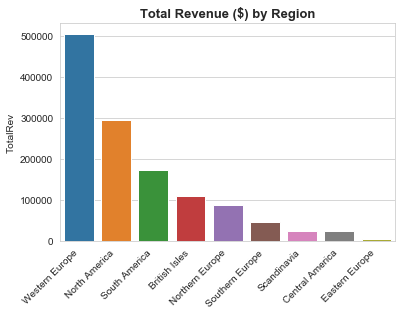

In [40]:
# Plotting to compare regional sales totals:
sns.set_style('whitegrid')
sns.color_codes=True
fig, ax = plt.subplots()

sns.barplot(x=df_region_preview.ShipRegion, y=df_region_preview.TotalRev)

ax.set_title('Total Revenue ($) by Region', fontsize=13, fontweight='semibold')
ax.set_xlabel('')
plt.xticks(rotation=45, ha='right')

fig.savefig('TotalRevbyRegion.png', bbox_inches='tight')
plt.show()

Should we choose to explore revenue by region further in our EDA, we should likely group smaller regions such as Central Europe to a new "Europe" region in order to increase our sample population and receive results that are more likely to be statistically significant.

However, it should be noted that economy and cultural preference are likely factored into the region categorization implemented by Northwind, and may play a role in consumer purchase behavior. In a future experiment (with additional customers/sales in the "smaller" regions' dataset), Northwind could analyze the performance of these smaller regions individually.

In [41]:
# Dropping ShipPostalCode Column, as we have City/Region/Country info:
df_order.drop('ShipPostalCode', axis=1, inplace=True)

In [42]:
# Filling null values for ShippedDate:
df_order.ShippedDate.fillna('0', inplace=True)

**Shipper, Supplier Table Scrubbing:**

In [43]:
# Reviewing Shipper DataFrame:
print(len(df_shipper.CompanyName))
df_shipper.head()

3


,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


In [44]:
print(df_shipper.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
Id             3 non-null int64
CompanyName    3 non-null object
Phone          3 non-null object
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes
None


In [45]:
# Reviewing Supplier DataFrame
df_supplier.head(3)

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None


In [46]:
# Investigating Supplier DataFrame for presence of Null Values

# Dropping the 'Fax' and 'HomePage' columns:
df_supplier.drop(['Fax', 'HomePage'], axis=1, inplace=True)
print(df_supplier.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
Id              29 non-null int64
CompanyName     29 non-null object
ContactName     29 non-null object
ContactTitle    29 non-null object
Address         29 non-null object
City            29 non-null object
Region          29 non-null object
PostalCode      29 non-null object
Country         29 non-null object
Phone           29 non-null object
dtypes: int64(1), object(9)
memory usage: 2.3+ KB
None


While the data above does allow us to examine the links and shape of Northwind's supply chain, there is no data in the dataset related to sales prices/shipping rates.

While we could examine differences in product quantities shipped or purchases made through Northwind's suppliers/shippers, these comparisons lack the context of cost.

In a future experiment, Northwind might consider adding their expenditures with partner companies to the database so that their efficiency can be evaluated with greater confidence.

# Data Exploration/Analysis:

## Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?

**4.1.1 Do discounts have a statistically significant effect on the number of products customers order?**
* $H_{0}:$ Discount has no effect on the number of products ordered.
* $H_{a}:$ Discount does have an effect on number of products ordered.
* $\alpha$ = 0.05

In [47]:
# Creating new DataFrame:
df_discount_basic = pd.read_sql_query("""SELECT ProductId, UnitPrice, Quantity, Discount FROM OrderDetail""", engine)
df_discount_basic.head()

2019-06-24 21:24:28,412 INFO sqlalchemy.engine.base.Engine SELECT ProductId, UnitPrice, Quantity, Discount FROM OrderDetail
2019-06-24 21:24:28,413 INFO sqlalchemy.engine.base.Engine ()


,ProductId,UnitPrice,Quantity,Discount
0,11,14.0,12,0.0
1,42,9.8,10,0.0
2,72,34.8,5,0.0
3,14,18.6,9,0.0
4,51,42.4,40,0.0


In [48]:
# Creating a new column to identify presence of Discount/no Discount:
df_discount_basic['DiscBool'] = df_discount_basic['Discount'].apply(lambda x: 0 if x == 0 else 1)

In [49]:
# Since nearly every discount value is a multiple of .05, we will discard other values.
df_discount_basic.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [50]:
# Dropping values where Discount%.05 != 0:
df_discount_basic = df_discount_basic[df_discount_basic.Discount.isin(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'])]
df_discount_basic.describe()

,ProductId,UnitPrice,Quantity,Discount,DiscBool
count,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000
mean,40.805776,26.203987,23.895203,0.056265,0.386586
std,22.148297,29.855453,19.009580,0.083586,0.487081
min,1.000000,2.000000,1.000000,0.000000,0.000000
25%,22.000000,12.000000,10.000000,0.000000,0.000000
50%,41.000000,18.400000,20.000000,0.000000,0.000000
75%,60.000000,32.000000,30.000000,0.100000,1.000000
max,77.000000,263.500000,130.000000,0.250000,1.000000


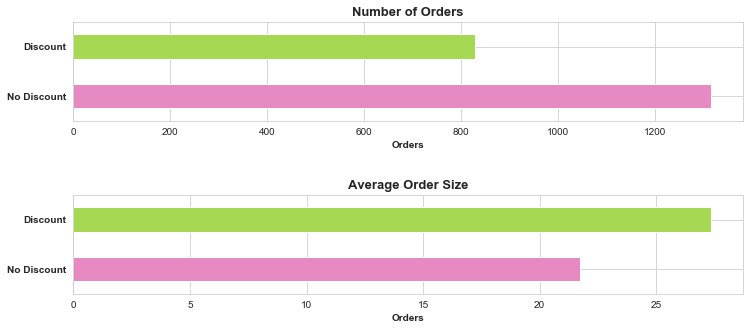

In [51]:
# Visualizing Number of Orders and Average Order Size by hue DiscBool:
fig, axes = plt.subplots(2, 1, figsize=(12,5))
sns.set_style('whitegrid')

# Grouping DataFrame for visualization:
df_discount_basic.groupby(['DiscBool'])['Quantity'].count().plot(kind='barh', ax=axes[0], color=['#E78AC3', '#A6D854'])
df_discount_basic.groupby(['DiscBool'])['Quantity'].mean().plot(kind='barh', ax=axes[1], color=['#E78AC3', '#A6D854'])

# Subplot 1 Labels:
axes[0].set_title('Number of Orders', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Orders', fontweight='semibold')
axes[0].set_ylabel('')
axes[0].set_yticklabels(['No Discount', 'Discount'], fontweight='semibold')

#Subplot 2 Labels:
axes[1].set_title('Average Order Size', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Orders', fontweight='semibold')
axes[1].set_ylabel('')
axes[1].set_yticklabels(['No Discount', 'Discount'], fontweight='semibold')
fig.subplots_adjust(hspace=.75)

fig.savefig('Order_numbersandsize_discbool.png', bbox_inches='tight')
plt.show()

In [52]:
# Difference Between Number of Orders and Avg Size by hue Discount:
print(f"- There were **{df_discount_basic.groupby(['DiscBool'])['Quantity'].count()[0] - df_discount_basic.groupby(['DiscBool'])['Quantity'].count()[1]}** more orders made where there was no discount.")
print(f"- The average order size for discounted items was **{df_discount_basic.groupby(['DiscBool'])['Quantity'].mean()[1] - df_discount_basic.groupby(['DiscBool'])['Quantity'].mean()[0]}** items greater than the order size when there was no discount.")     

- There were **487** more orders made where there was no discount.
- The average order size for discounted items was **5.638954908472158** items greater than the order size when there was no discount.



As seen above, while there are less orders made for discounted items, the average order size when purchasing discounted items is larger. In order to determine the effect of any discount to sales, we will determine whether the differences illustrated above are stastically significant.

*Note: This initial inquiry does not factor in item price or discount level.*



In [53]:
# Create DataFrame where value for Discount > 0:
query1 = 'DiscBool > 0'
df_discount_bool = df_discount_basic.query(query1)

# Create DataFrame where value for Discount == 0:
query2 = 'DiscBool == 0'
df_nodiscount_bool = df_discount_basic.query(query2)

In [54]:
df_discount_bool.describe()

,ProductId,UnitPrice,Quantity,Discount,DiscBool
count,830.000000,830.000000,830.000000,830.000000,830.0
mean,39.868675,26.255482,27.354217,0.145542,1.0
std,22.019037,30.091176,20.720667,0.071250,0.0
min,1.000000,2.000000,1.000000,0.050000,1.0
25%,21.000000,12.125000,12.250000,0.100000,1.0
50%,40.000000,18.000000,20.000000,0.150000,1.0
75%,59.000000,31.230000,36.000000,0.200000,1.0
max,77.000000,263.500000,130.000000,0.250000,1.0


In [55]:
df_nodiscount_bool.describe()

,ProductId,UnitPrice,Quantity,Discount,DiscBool
count,1317.000000,1317.000000,1317.000000,1317.0,1317.0
mean,41.396355,26.171534,21.715262,0.0,0.0
std,22.217410,29.717354,17.507493,0.0,0.0
min,1.000000,2.000000,1.000000,0.0,0.0
25%,23.000000,12.000000,10.000000,0.0,0.0
50%,41.000000,18.400000,18.000000,0.0,0.0
75%,60.000000,32.800000,30.000000,0.0,0.0
max,77.000000,263.500000,130.000000,0.0,0.0


In [56]:
# Generate values to represent a normal distributions using dataset:
discount_mu, discount_sigma, discount_n = 27.35, 20.72, 830
no_discount_mu, no_discount_sigma, no_discount_n = 21.72, 17.51, 1317

# Generating Normal Distributions using KDE_gen fxn:
discount_KDE = KDE_gen(discount_mu, discount_sigma, discount_n)
no_discount_KDE = KDE_gen(no_discount_mu, no_discount_sigma, no_discount_n)

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


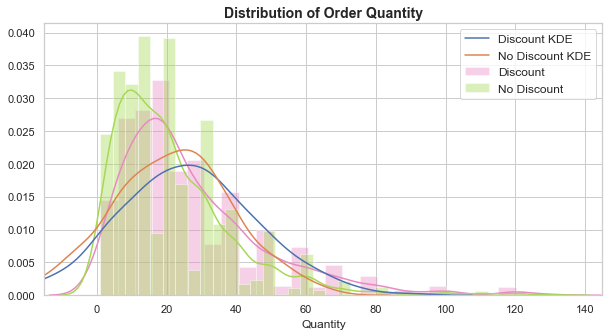

In [57]:
# Visualizing Distribution of orders with/without discounts:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')

ax = sns.distplot(df_discount_bool.Quantity, label='Discount', color='#E78AC3')
ax = sns.distplot(df_nodiscount_bool.Quantity, label='No Discount', color='#A6D854')
ax = sns.kdeplot(discount_KDE, label='Discount KDE')
ax = sns.kdeplot(no_discount_KDE, label='No Discount KDE')
ax.set_xlim(-15, 145)
ax.set_title('Distribution of Order Quantity', fontsize=14, fontweight='bold')
ax.legend(loc=1, fontsize='medium');

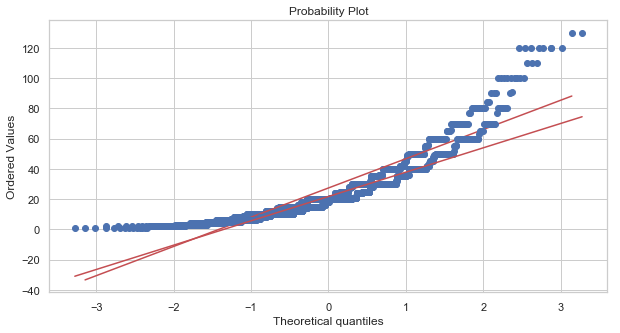

In [58]:
# Investigating Distribution:
stats.probplot(df_discount_bool.Quantity, plot = plt), 
stats.probplot(df_nodiscount_bool.Quantity, plot = plt),
plt.show()

In [59]:
variance_ratio(a=df_discount_bool.Quantity, b=df_nodiscount_bool.Quantity)

1.4001218425014454

Based on the results above, we can see that there is some amount of positive skew present in the distribution of order sizes. However, based on the sample population sizes, we can accept the distribution as normal.

Because the variables are independent, distributed normally, but do not show homogeneity in variance, we will use a Welch's two-tailed t-test to test the assertions made by our hypothesis.

In [60]:
a = df_discount_bool.Quantity.mean()
b = df_nodiscount_bool.Quantity.mean()
results_printer(a,b)

Avg with discount: 27.35
Avg with no discount: 21.72
Effect Size: 5.64
Relative effect size: 0.26


In [61]:
# 2 tailed T:
stats.ttest_ind(df_discount_bool.Quantity, df_nodiscount_bool.Quantity, equal_var=False)

Ttest_indResult(statistic=6.511219067380875, pvalue=1.0051255540843165e-10)

**4.1.1 Do discounts have a statistically significant effect on the number of products customers order?**
* $H_{0}:$ Discount has no effect on the number of products ordered.
* $H_{a}:$ Discount does have an effect on number of products ordered.
* $\alpha$ = 0.05

The resulting p-value of our two-tailed Welch's t-test is 1.00e$^{-10}$.

p < 0.05

**Discounts do have a statistically significant effect on the number of products customers order.**

The resulting p-value is less than our alpha value of 0.05. Therefore, we reject the null hypothesis that there is no difference between average order size for orders with and without discounts. Since we've confirmed that discounts do have a statistically significant effect on the number of products customers order, we can explore the difference in effect at each level of discount.

**4.1.2 If so, at what level(s) of discount?**
* $H_{0}:$ The average number of products ordered by customers is the same regardless of discount level.
<br>
* $H_{a}:$ The average number of products ordered by customers is not the same as discount level changes.
<br>
* $\alpha$ = 0.05

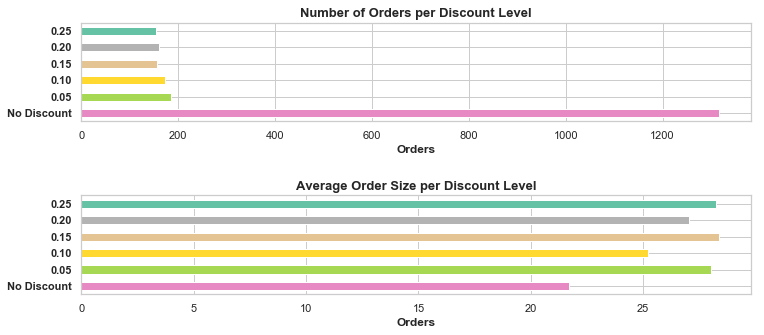

In [62]:
# Repeating above visualization for each discount value:
fig, axes = plt.subplots(2, 1, figsize=(12,5))
sns.set_style('whitegrid')

# Grouping DataFrame for visualization:
df_discount_basic.groupby(['Discount'])['Quantity'].count().plot(kind='barh', ax=axes[0], \
                                    color=['#E78AC3', '#A6D854', '#FFD92F', '#E5C494', '#B3B3B3', '#66C2A5'])
df_discount_basic.groupby(['Discount'])['Quantity'].mean().plot(kind='barh', ax=axes[1], \
                                    color=['#E78AC3', '#A6D854', '#FFD92F', '#E5C494', '#B3B3B3', '#66C2A5'])

# Subplot 1 Labels:
axes[0].set_title('Number of Orders per Discount Level', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Orders', fontweight='semibold')
axes[0].set_ylabel('')
axes[0].set_yticklabels(['No Discount', '0.05', '0.10', '0.15', '0.20', '0.25'], fontweight='semibold')

# Subplot 2 Labels:
axes[1].set_title('Average Order Size per Discount Level', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Orders', fontweight='semibold')
axes[1].set_ylabel('')
axes[1].set_yticklabels(['No Discount', '0.05', '0.10', '0.15', '0.20', '0.25'], fontweight='semibold')
fig.subplots_adjust(hspace=.75);

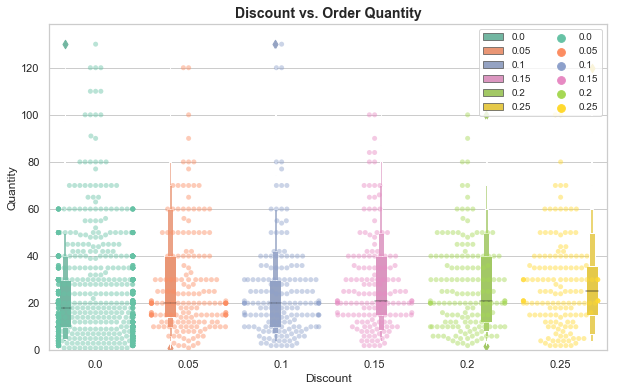

In [63]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('whitegrid')

ax = sns.boxenplot(data=df_discount_basic, x=df_discount_basic.Discount, y=df_discount_basic.Quantity, \
                   hue=df_discount_basic.Discount, palette='Set2')
ax = sns.swarmplot(data=df_discount_basic, x=df_discount_basic.Discount, y=df_discount_basic.Quantity, \
                   hue=df_discount_basic.Discount, palette='Set2', alpha=.45)

ax.set_title('Discount vs. Order Quantity', fontsize=14, fontweight='bold')
ax.set_ylim(0)
ax.legend(loc=1, fontsize='small', ncol=2);

In contrast to our analysis in part 1a., when order quantity is visualized at each discount level we can observe a larger difference in number of orders and a smaller difference in average order size at each individual level of discount.

In [64]:
# Fitting model to prepare to calculate ANOVA:
lm = ols('Quantity ~ C(Discount)', df_discount_bool).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6741
Date:                Mon, 24 Jun 2019   Prob (F-statistic):              0.610
Time:                        21:24:34   Log-Likelihood:                -3691.7
No. Observations:                 830   AIC:                             7393.
Df Residuals:                     825   BIC:                             7417.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              28.0108      1.525     18.372      0.000      25.018      31.003
C(Discount)[T.0.1]     -2.7738      2.193     -1.265      0.206      -7.079       1.531
C(Discount)[T.0.15]     0.3714      2.250      0.165      0.869      -4.045       4.788
C(Discount)[T.0.2]     -0.9860      2.235     -0.441      0.659      -5.373       3.401
C(Discount)[T.0.25]     0.2294      2.262      0.101      0.919      -4.211       4.669
==============================================================================
Omnibus:                      263.705   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              751.622
Skew:                           1.598   Prob(JB):                    6.13e-164
Kurtosis:                       6.394   Cond. No.                         5.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
df_discount_bool# ANOVA analysis to test multiple pairwise comparisons:
sm.stats.anova_lm(lm, typ=2)

,sum_sq,df,F,PR(>F)
C(Discount),1159.517551,4.0,0.674103,0.610041
Residual,354768.342690,825.0,NaN,NaN


In [66]:
df_discount_bool_05 = df_discount_bool[df_discount_bool.Discount.isin([.05])]
df_discount_bool_10 = df_discount_bool[df_discount_bool.Discount.isin([.1])]
df_discount_bool_15 = df_discount_bool[df_discount_bool.Discount.isin([.15])]
df_discount_bool_20 = df_discount_bool[df_discount_bool.Discount.isin([.2])]
df_discount_bool_25 = df_discount_bool[df_discount_bool.Discount.isin([.25])]

df_discount_bool_05.head()

,ProductId,UnitPrice,Quantity,Discount,DiscBool
8,22,16.8,6,0.05,1
9,57,15.6,15,0.05,1
11,20,64.8,40,0.05,1
12,33,2.0,25,0.05,1
51,12,30.4,12,0.05,1


In [67]:
# Segmenting by discount level to prepare data for Tukey test:
values = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25]
df_discount_tukey = df_discount_basic[df_discount_basic.Discount.isin(values)]
df_discount_tukey.head()

,ProductId,UnitPrice,Quantity,Discount,DiscBool
0,11,14.0,12,0.0,0
1,42,9.8,10,0.0,0
2,72,34.8,5,0.0,0
3,14,18.6,9,0.0,0
4,51,42.4,40,0.0,0


In [68]:
# Performing Tukey Test to Compare Discount Levels:
tk = pairwise_tukeyhsd(df_discount_tukey.Quantity, df_discount_tukey.Discount, .05)
print(tk)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 0.0    0.05   6.2955   2.0814 10.5097  True 
 0.0    0.1    3.5217  -0.8187  7.8622 False 
 0.0    0.15   6.6669   2.1352 11.1986  True 
 0.0    0.2    5.3096   0.8285  9.7907  True 
 0.0    0.25   6.525    1.954   11.096  True 
 0.05   0.1   -2.7738  -8.4504  2.9028 False 
 0.05   0.15   0.3714  -5.4528  6.1955 False 
 0.05   0.2    -0.986  -6.7708  4.7989 False 
 0.05   0.25   0.2294  -5.6253  6.0842 False 
 0.1    0.15   3.1452   -2.771  9.0613 False 
 0.1    0.2    1.7879  -4.0896  7.6653 False 
 0.1    0.25   3.0033   -2.943  8.9496 False 
 0.15   0.2   -1.3573  -7.3775  4.6628 False 
 0.15   0.25  -0.1419  -6.2292  5.9454 False 
 0.2    0.25   1.2154  -4.8343  7.2652 False 
---------------------------------------------


**4.1.2 If so, at what level(s) of discount?**
* $H_{0}:$ The number of products ordered by customers is the same regardless of discount level.
<br>
* $H_{a}:$ The number of products ordered by customers is not the same as discount level changes. 
<br>
* $\alpha$ = 0.05

Reviewing the results of the Tukey test, we fail to reject the null hypothesis that there is a significant difference between the control group (no discount) and the experimental group discount level 0.10. 

For discount levels of 0.05, 0.15, 0.20, and 0.25, we reject the null hypothesis, indicating that there **is** a significant difference in the number of products ordered between the control group (no discount) and experimental groups with discount levels of 0.05, 0.15, 0.20, and 0.25

**There is no statistically significant difference in number of products ordered between groups with non-zero discount level.**

While valuable, the results obtained from our first inquiry necessitate consideration of item price to give context. Before definining the parameters of our next inquiry, let's review the results obtained thusfar.

**Summation:**
<br>
There is a statistically significant difference in order quantity based on the presence of a discount at any level, but there is not a statistically significant difference between order quantity and discount level at discount level 0.10.

Great! We can safely advise our client that customers order more products when a discount is offered, but that the delta in customer order volume for each discount level is not statistically significant. However, this data doesn't tell the full story. In order to advise the client on whether (and at what level) to offer discounts, we must determine whether the increase in product orders for discounted items produces a statistically significant difference in every company's #1 metric for success, **revenue**. 

Essentially, we need to determine whether or not customers spend more when discounts are present and whether additional spend exists to offset the loss in potential revenue due to discounts. For example, if there is no statistically significant difference in customer spend regardless of whether a 5% or 25% discount is offered, we would likely advise the client to reduce the discount level of most items to 5%.

## Do discounts have a statistically significant effect on customer spend per order? If so, at what level(s) of discount?

**4.2.1 Do discounts have a statistically significant effect on customer spend?**
* $H_{0}:$ Discounts do not have a statistically significant effect customer spend.
<br>
* $H_{a}:$ Discounts do have a statistically significant effect (whether positive or negative) on customer spend.
<br>
* $\alpha$ = 0.05

In [69]:
df_discount_spend_t = pd.read_sql_query("""SELECT o.OrderId, o.UnitPrice, o.Discount, o.Quantity, p.QuantityPerUnit \
                    FROM [OrderDetail] o \
                    INNER JOIN Product p on o.ProductId = p.ID
                    GROUP BY o.OrderId;""", engine)
df_discount_spend_t.head(3)

2019-06-24 21:24:34,901 INFO sqlalchemy.engine.base.Engine SELECT o.OrderId, o.UnitPrice, o.Discount, o.Quantity, p.QuantityPerUnit                     FROM [OrderDetail] o                     INNER JOIN Product p on o.ProductId = p.ID
                    GROUP BY o.OrderId;
2019-06-24 21:24:34,902 INFO sqlalchemy.engine.base.Engine ()


,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnit
0,10248,34.8,0.00,5,24 - 200 g pkgs.
1,10249,42.4,0.00,40,50 - 300 g pkgs.
2,10250,16.8,0.15,15,32 - 8 oz bottles


In [70]:
df_discount_spend = pd.read_sql_query("""SELECT od.OrderId, od.UnitPrice, od.Discount, od.Quantity, \
                    od.Quantity * od.UnitPrice * (1-od.Discount) OrderPrice \
                    FROM [OrderDetail] od \
                    INNER JOIN Product p on od.ProductId = p.ID
                    GROUP BY od.OrderId;""", engine)
print(len(df_discount_spend))
df_discount_spend.head(3)

2019-06-24 21:24:34,923 INFO sqlalchemy.engine.base.Engine SELECT od.OrderId, od.UnitPrice, od.Discount, od.Quantity,                     od.Quantity * od.UnitPrice * (1-od.Discount) OrderPrice                     FROM [OrderDetail] od                     INNER JOIN Product p on od.ProductId = p.ID
                    GROUP BY od.OrderId;
2019-06-24 21:24:34,924 INFO sqlalchemy.engine.base.Engine ()
830


,OrderId,UnitPrice,Discount,Quantity,OrderPrice
0,10248,34.8,0.00,5,174.0
1,10249,42.4,0.00,40,1696.0
2,10250,16.8,0.15,15,214.2


In [71]:
df_discount_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 5 columns):
OrderId       830 non-null int64
UnitPrice     830 non-null float64
Discount      830 non-null float64
Quantity      830 non-null int64
OrderPrice    830 non-null float64
dtypes: float64(3), int64(2)
memory usage: 32.5 KB


In [72]:
# Creating a new column to identify presence of Discount/no Discount:
df_discount_spend['DiscBool'] = df_discount_spend['Discount'].apply(lambda x: 0 if x == 0 else 1)
df_discount_spend.head(3)

,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DiscBool
0,10248,34.8,0.00,5,174.0,0
1,10249,42.4,0.00,40,1696.0,0
2,10250,16.8,0.15,15,214.2,1


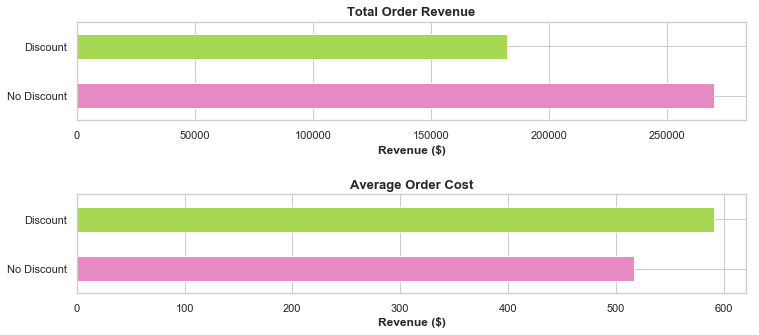

In [73]:
# Visualizing Order Price by hue DiscBool:
sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 1, figsize=(12,5))

# Grouping DataFrame for visualization:
df_discount_spend.groupby(['DiscBool'])['OrderPrice'].sum().plot(kind='barh', ax=axes[0], color=['#E78AC3', '#A6D854'])
df_discount_spend.groupby(['DiscBool'])['OrderPrice'].mean().plot(kind='barh', ax=axes[1], color=['#E78AC3', '#A6D854'])

# Subplot 1 Labels:
axes[0].set_title('Total Order Revenue', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Revenue ($)', fontweight='semibold')
axes[0].set_ylabel('')
axes[0].set_yticklabels(['No Discount', 'Discount'])

#Subplot 2 Labels:
axes[1].set_title('Average Order Cost', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Revenue ($)', fontweight='semibold')
axes[1].set_ylabel('')
axes[1].set_yticklabels(['No Discount', 'Discount'])
fig.subplots_adjust(hspace=.75)

fig.savefig('Avg_and_tot_order_rev.png', bbox_inches='tight')
plt.show()

Based on the visualization above, we can determine that Northwind generates more total revenue from sales of non-discounted items. However, the average order cost for orders containing discounts is greater than those without discounts. To determine whether this difference is statistically significant, we should first review the distribution of Order Price for orders with and without discount(s).

In [74]:
# Segmenting df_discount_spend based on presence of discount:
# Create DataFrame where value for Discount > 0:
query1 = 'Discount > 0'
df_discount_spend_disc = df_discount_spend.query(query1)

# Create DataFrame where value for Discount == 0:
query2 = 'Discount == 0'
df_discount_spend_nodisc = df_discount_spend.query(query2)

In [75]:
# Previewing newly created DataFrame:
print(len(df_discount_spend_disc))
df_discount_spend_disc.head(3)

308


,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DiscBool
2,10250,16.8,0.15,15,214.20,1
10,10258,25.6,0.20,6,122.88,1
12,10260,12.0,0.25,21,189.00,1


In [76]:
# Previewing newly created DataFrame:
print(len(df_discount_spend_nodisc))
df_discount_spend_nodisc.head(4)

522


,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DiscBool
0,10248,34.8,0.0,5,174.0,0
1,10249,42.4,0.0,40,1696.0,0
3,10251,16.8,0.0,20,336.0,0
4,10252,27.2,0.0,40,1088.0,0


In [77]:
# Viewing distributions of newly created DataFrame:
df_discount_spend_disc.describe()

,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DiscBool
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.0
mean,10653.461039,24.464058,0.145942,27.428571,591.426547,1.0
std,230.064716,21.738923,0.070996,22.444098,847.375023,0.0
min,10250.000000,2.500000,0.050000,2.000000,17.000000,1.0
25%,10459.000000,12.000000,0.100000,12.000000,173.310000,1.0
50%,10642.500000,18.000000,0.150000,20.000000,334.000000,1.0
75%,10844.000000,32.912500,0.200000,35.000000,678.250000,1.0
max,11076.000000,210.800000,0.250000,130.000000,8432.000000,1.0


In [78]:
# Viewing distributions of newly created DataFrame:
df_discount_spend_nodisc.describe()

,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DiscBool
count,522.000000,522.000000,522.0,522.000000,522.000000,522.0
mean,10667.833333,25.107261,0.0,20.201149,517.180460,0.0
std,245.338086,27.939034,0.0,15.978385,971.579167,0.0
min,10248.000000,2.000000,0.0,1.000000,12.500000,0.0
25%,10450.500000,12.500000,0.0,9.000000,135.025000,0.0
50%,10680.000000,18.000000,0.0,16.000000,285.000000,0.0
75%,10887.750000,33.250000,0.0,30.000000,567.500000,0.0
max,11077.000000,263.500000,0.0,130.000000,15810.000000,0.0


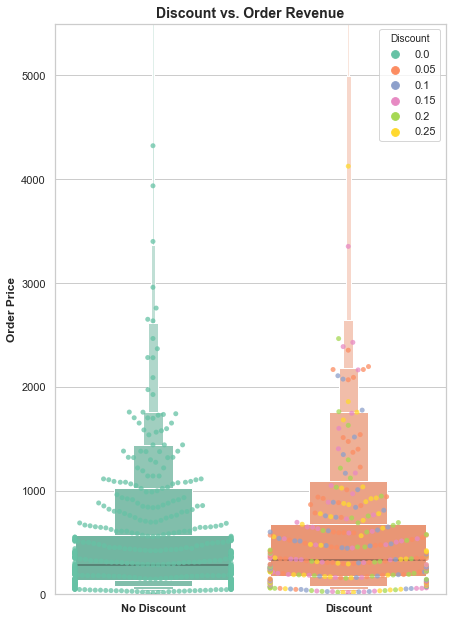

In [79]:
# Visualizing order price frequency by hue Discount:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(7,10.5))

# Plotting boxenplot and swarm plot on the same axis:
ax = sns.boxenplot(data=df_discount_spend, x=df_discount_spend.DiscBool, y=df_discount_spend.OrderPrice, palette='Set2')
ax = sns.swarmplot(data=df_discount_spend, x=df_discount_spend.DiscBool, y=df_discount_spend.OrderPrice, hue=df_discount_spend.Discount, palette='Set2', alpha=.75)

# Labeling:
ax.set_title('Discount vs. Order Revenue', fontsize=14, fontweight='bold')
ax.set_ylabel('Order Price', fontweight='semibold')
ax.set_ylim(0, 5500)
ax.set_xlabel('')
ax.set_xticklabels(['No Discount', 'Discount'], fontweight='semibold')

fig.savefig('DiscountvsOrderRevBoxen.png', bbox_inches='tight')
plt.show()

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


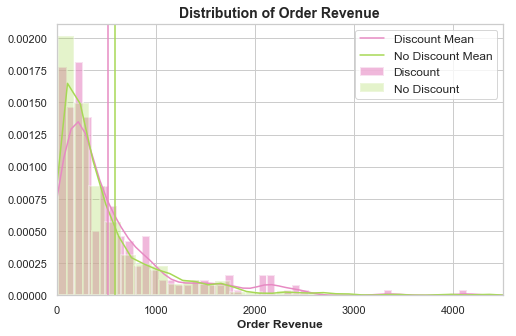

In [80]:
# Visualizing Distribution of Order Price with/without discounts:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,5))

# Plotting the distribution in order price with/without a discount:
ax = sns.distplot(df_discount_spend_disc.OrderPrice, label='Discount', color='#E78AC3', bins=100,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_discount_spend_nodisc.OrderPrice, label='No Discount', color='#A6D854', bins=100,
                  hist_kws={"linewidth": 2, "alpha": .3})

# Plotting vlines for sample means:
plt.axvline(np.mean(df_discount_spend_nodisc.OrderPrice), color='#E78AC3', label='Discount Mean')
plt.axvline(np.mean(df_discount_spend_disc.OrderPrice), color='#A6D854', label='No Discount Mean')


# Labeling/Formatting:
ax.set_xlim(-2, 4500)
#ax.set_ylim(0, .00005)
ax.set_title('Distribution of Order Revenue', fontsize=14, fontweight='bold')
ax.set_xlabel('Order Revenue', fontweight='semibold')
ax.legend(loc=1, fontsize='medium');

The visualization of Distribution of Order Revenue is positively skewed. Before determining the test we'll use to test our hypothesis, let's first visualize and compare the shapes of the distributions above in separate plots.

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


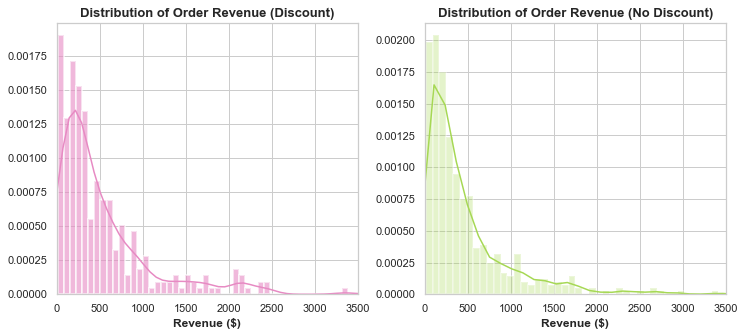

In [81]:
# Visualizing Distribution of Order Price with/without discounts:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,2, figsize=(12,5))

# Plotting the same distributions above on separate axes:
sns.distplot(df_discount_spend_disc.OrderPrice, label='Discount', color='#E78AC3', bins=120, ax=axes[0], 
                 hist_kws={"linewidth": 2, "alpha": .6})
sns.distplot(df_discount_spend_nodisc.OrderPrice, label='No Discount', color='#A6D854', bins=200, 
                  hist_kws={"linewidth": 2, "alpha": .3})

# Subplot 1 Labels:
axes[0].set_title('Distribution of Order Revenue (Discount)', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Revenue ($)', fontweight='semibold')
axes[0].set_ylabel('')
axes[0].set_xlim(-2, 3500)

#Subplot 2 Labels:
axes[1].set_title('Distribution of Order Revenue (No Discount)', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Revenue ($)', fontweight='semibold')
axes[1].set_ylabel('')
axes[1].set_xlim(-2, 3500)

fig.subplots_adjust(wspace=.22)

fig.savefig('OrderRev_Distribution_hist_bool.png', bbox_inches='tight')
plt.show()

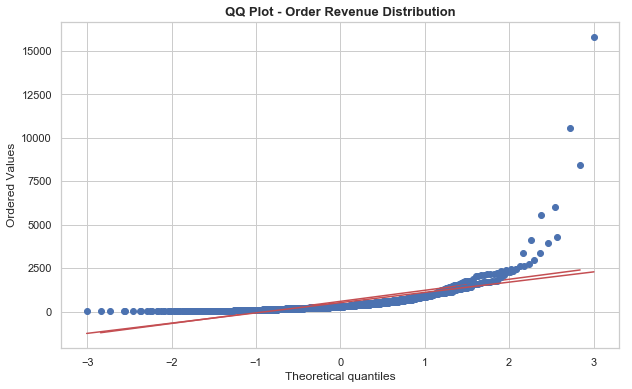

In [82]:
# Visualizing Distribution:
fig, ax = plt.subplots()

stats.probplot(df_discount_spend_disc.OrderPrice, plot = plt), 
stats.probplot(df_discount_spend_nodisc.OrderPrice, plot = plt),

ax.set_title('QQ Plot - Order Revenue Distribution', fontsize=13, fontweight='semibold')

plt.show()

A visual examination of the distribution of Order Revenue suggests that we should transform the data to fit a normal distribution before modeling and hypothesis testing.

In [83]:
# Creating/previewing a copy of the df_discount_spend DataFrame:
df_log_discount_spend = df_discount_spend.copy()
df_log_discount_spend.head(3)

,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DiscBool
0,10248,34.8,0.00,5,174.0,0
1,10249,42.4,0.00,40,1696.0,0
2,10250,16.8,0.15,15,214.2,1


In [84]:
# Log-scaling Order Price:
log_order_price = np.log(df_log_discount_spend.OrderPrice)
df_log_discount_spend['LogOrderPrice'] = log_order_price

# Previewing DataFrame:
df_log_discount_spend.head(3)

,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DiscBool,LogOrderPrice
0,10248,34.8,0.00,5,174.0,0,5.159055
1,10249,42.4,0.00,40,1696.0,0,7.436028
2,10250,16.8,0.15,15,214.2,1,5.366910


In [85]:
# Segmenting df_log_discount_spend based on presence of discount:
# Create DataFrame where value for Discount > 0:
query1 = 'Discount > 0'
df_log_discount_spend_disc = df_log_discount_spend.query(query1)

# Create DataFrame where value for Discount == 0:
query2 = 'Discount == 0'
df_log_discount_spend_nodisc = df_log_discount_spend.query(query2)

In [86]:
# Verifying Output:
print(len(df_log_discount_spend_disc))
df_log_discount_spend_disc.head(3)

308


,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DiscBool,LogOrderPrice
2,10250,16.8,0.15,15,214.20,1,5.366910
10,10258,25.6,0.20,6,122.88,1,4.811208
12,10260,12.0,0.25,21,189.00,1,5.241747


In [87]:
# Verifying Output:
print(len(df_log_discount_spend_nodisc))
df_log_discount_spend_nodisc.head(3)

522


,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DiscBool,LogOrderPrice
0,10248,34.8,0.0,5,174.0,0,5.159055
1,10249,42.4,0.0,40,1696.0,0,7.436028
3,10251,16.8,0.0,20,336.0,0,5.817111


/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


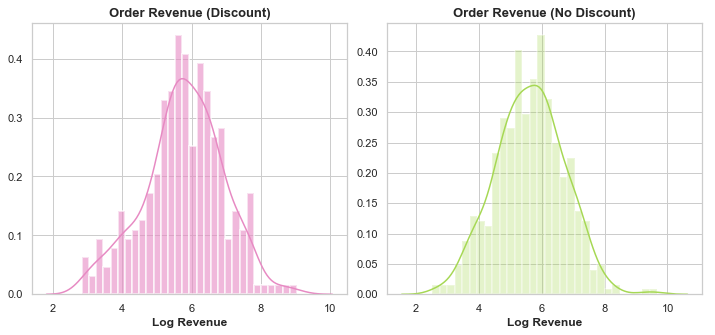

In [88]:
# Repeating the visualizations above using new column 'LogOrderPrice':
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=False)

sns.distplot(df_log_discount_spend_disc.LogOrderPrice, label='Discount', color='#E78AC3', bins=30, ax=axes[0], 
                 hist_kws={"linewidth": 2, "alpha": .6})
sns.distplot(df_log_discount_spend_nodisc.LogOrderPrice, label='No Discount', color='#A6D854', bins=30, ax=axes[1], 
                  hist_kws={"linewidth": 2, "alpha": .3})

# Subplot 1 Labels:
axes[0].set_title('Order Revenue (Discount)', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Log Revenue', fontweight='semibold')
axes[0].set_ylabel('')
#axes[0].set_xlim(-1000, 30000)

#Subplot 2 Labels:
axes[1].set_title('Order Revenue (No Discount)', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Log Revenue', fontweight='semibold')
axes[1].set_ylabel('')
#axes[1].set_xlim(-1000, 30000)
fig.subplots_adjust(wspace=.13)

fig.savefig('Log_OrderRev_Distribution_hist_bool.png', bbox_inches='tight')
plt.show()

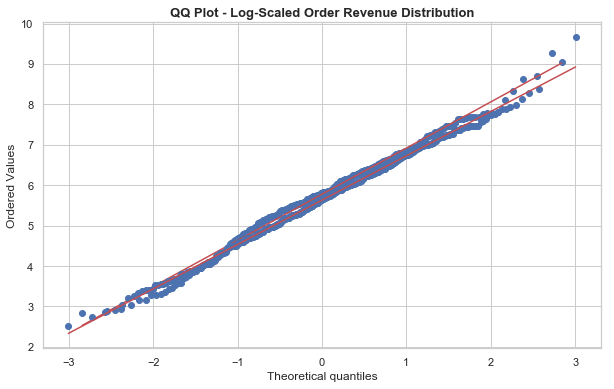

In [89]:
# Investigating Normality:
fig,ax = plt.subplots()

stats.probplot(df_log_discount_spend_disc.LogOrderPrice, plot = plt), 
stats.probplot(df_log_discount_spend_nodisc.LogOrderPrice, plot = plt),
ax.set_title('QQ Plot - Log-Scaled Order Revenue Distribution', fontsize=13, fontweight='semibold')

fig.savefig('QQ Plot - Log-Scaled Order Revenue Distribution.png', bbox_inches='tight')

plt.show()

In [90]:
# Investigating variance homogeneity:
variance_ratio(a=df_log_discount_spend_disc.LogOrderPrice, b=df_log_discount_spend_nodisc.LogOrderPrice)

1.0836127695528326

Great! Log transforming Order Revenue has normalized the data for both distributions. As our variables are independent, distributions of our variables is normal, and the variances are at an acceptable level of homogeneity, we can determine whether the presence of a discount has a statistically significant effect on Order Price using an independent two-tailed t-test.

In [91]:
# Using a two-tailed t-test to compare distributions above:
stats.ttest_ind(df_log_discount_spend_disc.LogOrderPrice, df_log_discount_spend_nodisc.LogOrderPrice)

Ttest_indResult(statistic=1.829039466630245, pvalue=0.06775322267188763)

**4.2.1 Do discounts have a statistically significant effect on average customer spend (order price)?**

* $H_{0}:$ Discounts do not have a statistically significant effect on average customer spend.
<br>
* $H_{a}:$ Discounts do have a statistically significant effect (whether positive or negative) on average customer spend.
<br>
* $\alpha$ = 0.05

The resulting p-value of our two-tailed t-test is 0.07.

Because p > 0.05 we fail to reject the null hypothesis that states that discount (as a boolean) does not have a statistically significant effect on customer spend.

**4.2.2 At what level(s) of discount is there a significant effect on average customer spend?**
* $H_{0}:$ Customer order price is the same regardless of discount level.
<br>
* $H_{a}:$ Customer order price is not the same as discount level changes.
<br>
* $\alpha$ = 0.05

In [92]:
df_log_discount_spend.head(3)

,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DiscBool,LogOrderPrice
0,10248,34.8,0.00,5,174.0,0,5.159055
1,10249,42.4,0.00,40,1696.0,0,7.436028
2,10250,16.8,0.15,15,214.2,1,5.366910


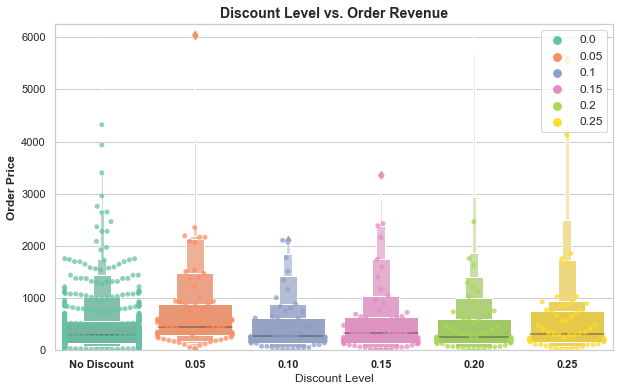

In [93]:
# Visualizing Order Prices by hue Discount Level:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.boxenplot(data=df_log_discount_spend, x=df_discount_spend.Discount, y=df_discount_spend.OrderPrice, palette='Set2')
ax = sns.swarmplot(data=df_log_discount_spend, x=df_discount_spend.Discount, y=df_discount_spend.OrderPrice, hue=df_discount_spend.Discount, palette='Set2', alpha=.75)

ax.set_title('Discount Level vs. Order Revenue', fontsize=14, fontweight='bold')
ax.set_ylabel('Order Price', fontweight='semibold')
ax.set_ylim(0,6250)
ax.set_xlabel('Discount Level')
ax.set_xticklabels(['No Discount', '0.05', '0.10', '0.15', '0.20', '0.25'], fontweight='semibold')
ax.legend(loc=1, fontsize='medium');

In [94]:
# Creating New DataFrames for varying discount level:
df_log_ds_nodisc = df_log_discount_spend[df_log_discount_spend.Discount.isin([0])]
df_log_ds_5p = df_log_discount_spend[df_log_discount_spend.Discount.isin([.05])]
df_log_ds_10p = df_log_discount_spend[df_log_discount_spend.Discount.isin([.10])]
df_log_ds_15p = df_log_discount_spend[df_log_discount_spend.Discount.isin([.15])]
df_log_ds_20p = df_log_discount_spend[df_log_discount_spend.Discount.isin([.20])]
df_log_ds_25p = df_log_discount_spend[df_log_discount_spend.Discount.isin([.25])]

In [95]:
# Reviewing sample population sizes:
print(f'Num Orders with no discount: {len(df_log_ds_nodisc)}')
print(f'Num Orders with 5% discount: {len(df_log_ds_5p)}')
print(f'Num Orders with 10% discount: {len(df_log_ds_10p)}')
print(f'Num Orders with 15% discount: {len(df_log_ds_15p)}')
print(f'Num Orders with 20% discount: {len(df_log_ds_20p)}')
print(f'Num Orders with 25% discount: {len(df_log_ds_25p)}')

Num Orders with no discount: 522
Num Orders with 5% discount: 70
Num Orders with 10% discount: 57
Num Orders with 15% discount: 65
Num Orders with 20% discount: 60
Num Orders with 25% discount: 56


/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


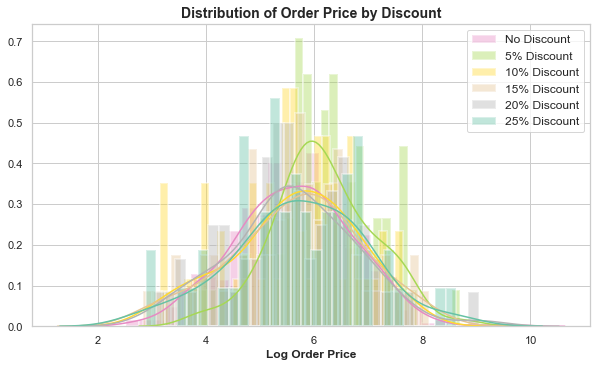

In [96]:
# Visualizing Distribution of Order Price with/without discounts:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,6))

# Plotting Overlapping distplots for each discount level:
ax = sns.distplot(df_log_ds_nodisc.LogOrderPrice, label='No Discount', color='#E78AC3', bins=30,
                 hist_kws={"linewidth": 2, "alpha":.4})
ax = sns.distplot(df_log_ds_5p.LogOrderPrice, label='5% Discount', color='#A6D854', bins=30,
                  hist_kws={"linewidth": 2, "alpha": .4})
ax = sns.distplot(df_log_ds_10p.LogOrderPrice, label='10% Discount', color='#FFD92F', bins=30,
                  hist_kws={"linewidth": 2, "alpha": .4})
ax = sns.distplot(df_log_ds_15p.LogOrderPrice, label='15% Discount', color='#E5C494', bins=30,
                  hist_kws={"linewidth": 2, "alpha": .4})
ax = sns.distplot(df_log_ds_20p.LogOrderPrice, label='20% Discount', color='#B3B3B3', bins=30,
                  hist_kws={"linewidth": 2, "alpha": .4})
ax = sns.distplot(df_log_ds_25p.LogOrderPrice, label='25% Discount', color='#66C2A5', bins=30,
                  hist_kws={"linewidth": 2, "alpha": .4})

# Adding labels/legend:
ax.set_xlabel('Log Order Price', fontweight='semibold')
ax.set_title('Distribution of Order Price by Discount', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=.85, bottom=.15);
ax.legend(loc=1, fontsize='medium');

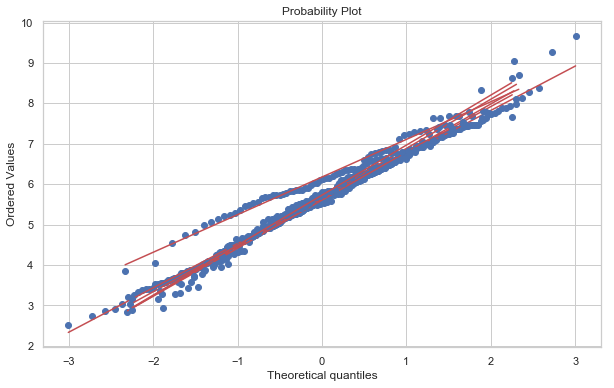

In [97]:
# Investigating Normality:
stats.probplot(df_log_ds_nodisc.LogOrderPrice, plot = plt), 
stats.probplot(df_log_ds_5p.LogOrderPrice, plot = plt),
stats.probplot(df_log_ds_10p.LogOrderPrice, plot = plt),
stats.probplot(df_log_ds_15p.LogOrderPrice, plot = plt),
stats.probplot(df_log_ds_20p.LogOrderPrice, plot = plt),
stats.probplot(df_log_ds_25p.LogOrderPrice, plot = plt)
plt.show()

Distribution of Order price appears normal across each discount level. We can now fit the data above to a model and use ANOVA/Tukey tests to measure variance between sample populations.

In [98]:
df_log_discount_spend.head(3)

,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DiscBool,LogOrderPrice
0,10248,34.8,0.00,5,174.0,0,5.159055
1,10249,42.4,0.00,40,1696.0,0,7.436028
2,10250,16.8,0.15,15,214.2,1,5.366910


In [99]:
# Fitting data to model:
lm = ols('LogOrderPrice ~ C(Discount)', df_log_discount_spend).fit()

In [100]:
# Printing OLS Regression Results:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LogOrderPrice   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.147
Date:                Mon, 24 Jun 2019   Prob (F-statistic):            0.00804
Time:                        21:24:45   Log-Likelihood:                -1258.4
No. Observations:                 830   AIC:                             2529.
Df Residuals:                     824   BIC:                             2557.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6285      0.048    116.259      0.000       5.533       5.724
C(Discount)[T.0.05]     0.5477      0.141      3.890      0.000       0.271       0.824
C(Discount)[T.0.1]     -0.0004      0.154     -0.003      0.998      -0.303       0.302
C(Discount)[T.0.15]     0.0394      0.145      0.271      0.786      -0.246       0.325
C(Discount)[T.0.2]     -0.0243      0.151     -0.161      0.872      -0.320       0.272
C(Discount)[T.0.25]     0.0996      0.156      0.640      0.522      -0.206       0.405
==============================================================================
Omnibus:                        0.238   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.169
Skew:                          -0.030   Prob(JB):                        0.919
Kurtosis:                       3.035   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# ANOVA test:
sm.stats.anova_lm(lm, typ=2)

,sum_sq,df,F,PR(>F)
C(Discount),19.250021,5.0,3.146751,0.008038
Residual,1008.152010,824.0,NaN,NaN


In [102]:
# Performing Tukey Test for Log Revenue by Discount Level:
tk2 = pairwise_tukeyhsd(df_log_discount_spend.LogOrderPrice, df_log_discount_spend.Discount, .05)
print(tk2)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 0.0    0.05   0.5477   0.1455  0.9499  True 
 0.0    0.1   -0.0004  -0.4412  0.4403 False 
 0.0    0.15   0.0394  -0.3761  0.455  False 
 0.0    0.2   -0.0243   -0.455  0.4064 False 
 0.0    0.25   0.0996  -0.3447  0.5438 False 
 0.05   0.1   -0.5481  -1.1118  0.0156 False 
 0.05   0.15  -0.5082  -1.0525  0.036  False 
 0.05   0.2    -0.572  -1.1278 -0.0161  True 
 0.05   0.25  -0.4481  -1.0146  0.1183 False 
 0.1    0.15   0.0399  -0.5335  0.6132 False 
 0.1    0.2   -0.0239  -0.6083  0.5605 False 
 0.1    0.25    0.1    -0.4945  0.6944 False 
 0.15   0.2   -0.0637  -0.6294  0.5019 False 
 0.15   0.25   0.0601  -0.5159  0.6362 False 
 0.2    0.25   0.1239  -0.4632  0.7109 False 
---------------------------------------------


The results of the Tukey test above indicate that there is a significant difference in order revenue between discount levels of:
* 0.0 and 0.05
* 0.5 and 0.20

## Do discounts have a statistically significant effect on Order Quantity by Category? If so, at what level(s) of discount?
*Note:  Product categories include 'Beverages', 'Condiments', 'Confections', 'Dairy Products', 'Grains/Cereals', 'Meat/Poultry', 'Produce', and 'Seafood'. 

**4.3.1 Do discounts have a statistically significant effect on the number of products customers order by category?**
* $H_{0}:$ Discounts do not have a statistically significant effect on number of products customers order by category.
<br>
* $H_{a}:$ Discounts either increase or decrease the number of products customers order by category.
<br>
* $\alpha$ = 0.05

In [103]:
df_discount_category_spend = pd.read_sql_query("""SELECT p.Id, c.CategoryName, p.ProductName, od.Discount, od.Quantity, p.QuantityPerUnit \
            FROM [Product] p \
            INNER JOIN [OrderDetail] od on od.ProductId = p.Id
            INNER JOIN [Category] c on c.Id = p.CategoryId""", engine)
df_discount_category_spend.head(3)

2019-06-24 21:24:45,711 INFO sqlalchemy.engine.base.Engine SELECT p.Id, c.CategoryName, p.ProductName, od.Discount, od.Quantity, p.QuantityPerUnit             FROM [Product] p             INNER JOIN [OrderDetail] od on od.ProductId = p.Id
            INNER JOIN [Category] c on c.Id = p.CategoryId
2019-06-24 21:24:45,712 INFO sqlalchemy.engine.base.Engine ()


,Id,CategoryName,ProductName,Discount,Quantity,QuantityPerUnit
0,11,Dairy Products,Queso Cabrales,0.0,12,1 kg pkg.
1,42,Grains/Cereals,Singaporean Hokkien Fried Mee,0.0,10,32 - 1 kg pkgs.
2,72,Dairy Products,Mozzarella di Giovanni,0.0,5,24 - 200 g pkgs.


In [104]:
df_discount_category_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id                 2155 non-null int64
CategoryName       2155 non-null object
ProductName        2155 non-null object
Discount           2155 non-null float64
Quantity           2155 non-null int64
QuantityPerUnit    2155 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 101.1+ KB


In [105]:
# Printing the value counts for unique CategoryNames in the dataset:
df_discount_category_spend.CategoryName.value_counts()

Beverages         404
Dairy Products    366
Confections       334
Seafood           330
Condiments        216
Grains/Cereals    196
Meat/Poultry      173
Produce           136
Name: CategoryName, dtype: int64

In [106]:
# Since nearly every discount value is a multiple of .05, we will discard other values.
print(len(df_discount_category_spend))
df_discount_category_spend.Discount.value_counts()

2155


0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [107]:
# Dropping values where Discount%.05 != 0:
df_discount_category_spend = df_discount_category_spend[df_discount_category_spend.Discount.isin(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'])]
# Verifying that only 1 row was dropped from the DataFrame:
print(len(df_discount_category_spend))

2147


In [108]:
# Creating a new column to identify presence of Discount/no Discount:
df_discount_category_spend['DiscBool'] = df_discount_category_spend['Discount'].apply(lambda x: 0 if x == 0 else 1)
df_discount_category_spend.head(3)

,Id,CategoryName,ProductName,Discount,Quantity,QuantityPerUnit,DiscBool
0,11,Dairy Products,Queso Cabrales,0.0,12,1 kg pkg.,0
1,42,Grains/Cereals,Singaporean Hokkien Fried Mee,0.0,10,32 - 1 kg pkgs.,0
2,72,Dairy Products,Mozzarella di Giovanni,0.0,5,24 - 200 g pkgs.,0


In [109]:
# Dropping 'QuantityPerUnit' column:
df_discount_category_spend.drop(['QuantityPerUnit'], axis=1, inplace=True)
df_discount_category_spend.head(3)

,Id,CategoryName,ProductName,Discount,Quantity,DiscBool
0,11,Dairy Products,Queso Cabrales,0.0,12,0
1,42,Grains/Cereals,Singaporean Hokkien Fried Mee,0.0,10,0
2,72,Dairy Products,Mozzarella di Giovanni,0.0,5,0


In [110]:
# Segmenting df_discount_spend based on presence of discount:
# Create DataFrame where value for Discount > 0:
query1 = 'Discount > 0'
df_discount_category_spend_disc = df_discount_category_spend.query(query1)

# Create DataFrame where value for Discount == 0:
query2 = 'Discount == 0'
df_discount_category_spend_nodisc = df_discount_category_spend.query(query2)

# Previewing newly created DataFrame:
print(len(df_discount_category_spend_disc))
print(len(df_discount_category_spend_nodisc))

830
1317


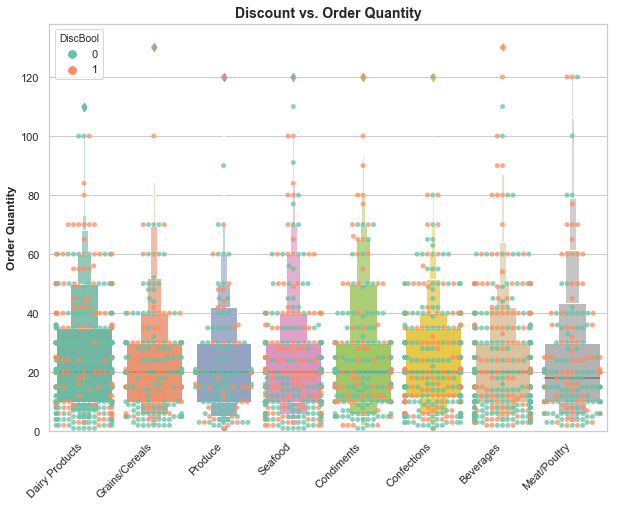

In [111]:
# Visualizing Distribution of Order Quantity for each Category Name:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,7.5))

# Plotting boxenplot and swarm plot on the same axis:
ax = sns.boxenplot(data=df_discount_category_spend, x=df_discount_category_spend.CategoryName, y=df_discount_category_spend.Quantity, palette='Set2')
ax = sns.swarmplot(data=df_discount_category_spend, x=df_discount_category_spend.CategoryName, y=df_discount_category_spend.Quantity, hue=df_discount_category_spend.DiscBool, palette='Set2', alpha=.75)

# Labeling:
ax.set_title('Discount vs. Order Quantity', fontsize=14, fontweight='bold')
ax.set_ylabel('Order Quantity', fontweight='semibold')
ax.set_ylim(0)
ax.set_xlabel('')

fig.savefig('DiscVsOrderQuant.png', bbox_inches='tight')

plt.xticks(rotation=45, ha='right')
plt.show()

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


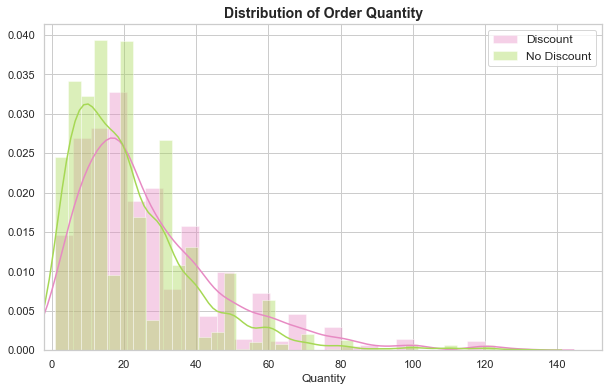

In [112]:
# Visualizing Distribution of Product Order Size with/without discounts:
sns.set_style('whitegrid')

# Plotting distributions:
ax = sns.distplot(df_discount_category_spend_disc.Quantity, label='Discount', color='#E78AC3')
ax = sns.distplot(df_discount_category_spend_nodisc.Quantity, label='No Discount', color='#A6D854')

# Label/Format:
ax.set_xlim(-2)
ax.set_title('Distribution of Order Quantity', fontsize=14, fontweight='bold')
ax.legend(loc=1, fontsize='medium');

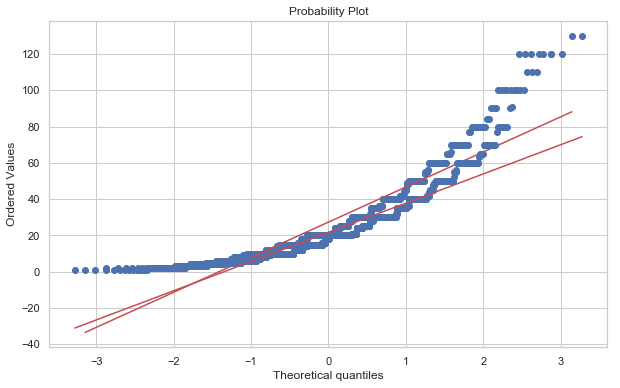

In [113]:
stats.probplot(df_discount_category_spend_disc.Quantity, plot = plt),
stats.probplot(df_discount_category_spend_nodisc.Quantity, plot = plt),
plt.show()

Because we're seeking to determine whether the means of two independent groups are significantly different, we'd like to conduct an Independent two tailed t-test.  However, we must first ensure that the populations meet the assumptions of normality and homogeneity of variance required. 

As seen above, the distribution for Order Quantities with and without a Discount are positively skewed. In order to conduct a two-tailed t-test, we should first normalize both distributions.

In [114]:
# Creating Copy of DataFrame:
df_log_discount_category_spend = df_discount_category_spend.copy()

# Log-scaling Order Quantity:
log_category_quant = np.log(df_log_discount_category_spend.Quantity)
df_log_discount_category_spend['LogOrderQuantity'] = log_category_quant

# Previewing DataFrame:
df_log_discount_category_spend.head(3)

,Id,CategoryName,ProductName,Discount,Quantity,DiscBool,LogOrderQuantity
0,11,Dairy Products,Queso Cabrales,0.0,12,0,2.484907
1,42,Grains/Cereals,Singaporean Hokkien Fried Mee,0.0,10,0,2.302585
2,72,Dairy Products,Mozzarella di Giovanni,0.0,5,0,1.609438


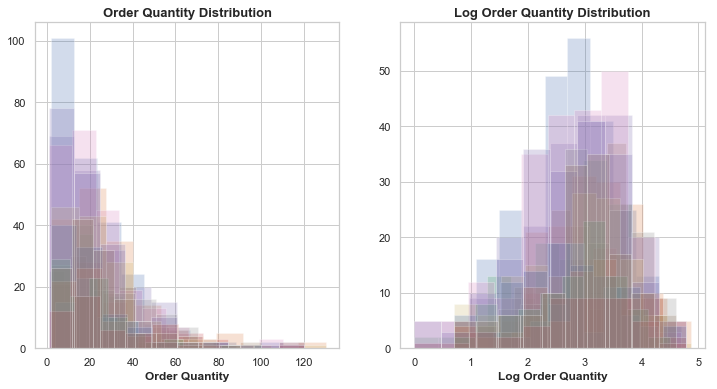

In [115]:
# Visualizing Number of Orders and Log Number of Orders by DiscBool:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(12,6))
ax.legend()

# Subplot 1:
df_discount_category_spend.groupby(['CategoryName', 'DiscBool'])['Quantity'].hist(ax=axes[0], alpha=.25)
#df_discount_category_spend_nodisc.groupby(['CategoryName'])['Quantity'].sum().plot(kind='barh', ax=axes[0], alpha=.3, color=['blue'])

# Subplot 2:
df_log_discount_category_spend.groupby(['CategoryName', 'DiscBool'])['LogOrderQuantity'].hist(ax=axes[1], alpha=.25)
#df_discount_category_spend_nodisc.groupby(['CategoryName'])['Quantity'].mean().plot(kind='barh', ax=axes[1], alpha=.3, color=['blue'])

# Subplot 1 Labels:
axes[0].set_title('Order Quantity Distribution', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Order Quantity', fontweight='semibold')
axes[0].set_ylabel('')
#axes[0].set_yticklabels(['No Discount', 'Discount'])

#Subplot 2 Labels:
axes[1].set_title('Log Order Quantity Distribution', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Log Order Quantity', fontweight='semibold')
axes[1].set_ylabel('')
#axes[1].set_yticklabels(['No Discount', 'Discount'])
fig.subplots_adjust(hspace=.35);

As seen above, log scaling the values for Order Quantity increased the distributions' normality. Next, we'll compare sample population variances and create a QQ plot of the distribution shape for Order Quantity with and without a discount.  

In [116]:
# Segmenting df_discount_spend based on presence of discount:
# Create DataFrame where value for Discount > 0:
query1 = 'Discount > 0'
df_log_discount_category_spend_disc = df_log_discount_category_spend.query(query1)

# Create DataFrame where value for Discount == 0:
query2 = 'Discount == 0'
df_log_discount_category_spend_nodisc = df_log_discount_category_spend.query(query2)

# Previewing newly created DataFrame:
print(len(df_log_discount_category_spend_disc))
print(len(df_log_discount_category_spend_nodisc))

830
1317


In [117]:
variance_ratio(a=df_log_discount_category_spend_disc.LogOrderQuantity, b=df_log_discount_category_spend_nodisc.LogOrderQuantity)

0.9030998215987438

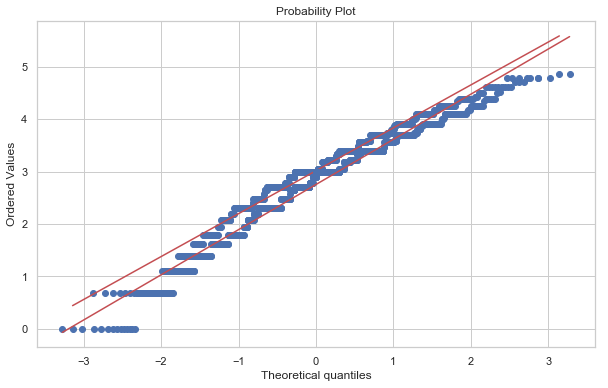

In [118]:
stats.probplot(df_log_discount_category_spend_disc.LogOrderQuantity, plot = plt),
stats.probplot(df_log_discount_category_spend_nodisc.LogOrderQuantity, plot = plt),
plt.show()

Great! With confirmation of normal distribution and homogeneity of variance in each population, the data meets the assumptions required to conduct an independent t-test.

In [119]:
# Using a two-tailed t-test to compare distributions above:
stats.ttest_ind(df_log_discount_category_spend_disc.LogOrderQuantity, df_log_discount_category_spend_nodisc.LogOrderQuantity)

Ttest_indResult(statistic=6.920700463008245, pvalue=5.91313388186685e-12)

Because p < 0.05, we reject the null hypothesis that there is no significant difference in Order quantity for orders with and without a discount. Based on these results, we would assert that discount has a significant effect on order quantity between categories.

Next, we should attempt to investigate whether this effect is significant between within each product category.

In [120]:
# Creating New DataFrames for Category Names:
df_discount_category_spend_dairy = df_discount_category_spend[df_discount_category_spend.CategoryName.isin(['Dairy Products'])]
df_discount_category_spend_grain = df_discount_category_spend[df_discount_category_spend.CategoryName.isin(["Grains/Cereals"])]
df_discount_category_spend_produce = df_discount_category_spend[df_discount_category_spend.CategoryName.isin(["Produce"])]
df_discount_category_spend_seafood = df_discount_category_spend[df_discount_category_spend.CategoryName.isin(["Seafood"])]
df_discount_category_spend_condiments = df_discount_category_spend[df_discount_category_spend.CategoryName.isin(['Condiments'])]
df_discount_category_spend_confections = df_discount_category_spend[df_discount_category_spend.CategoryName.isin(['Confections'])]
df_discount_category_spend_bev = df_discount_category_spend[df_discount_category_spend.CategoryName.isin(["Beverages"])]
df_discount_category_spend_meat = df_discount_category_spend[df_discount_category_spend.CategoryName.isin(['Meat/Poultry'])]

In [121]:
# Segmenting newly created DataFrames by bool Discount:
# Dairy:
query1 = 'Discount > 0'
df_discount_category_spend_dairy_disc = df_discount_category_spend_dairy.query(query1)
query2 = 'Discount == 0'
df_discount_category_spend_dairy_nodisc = df_discount_category_spend_dairy.query(query2)

# Grain:
query1 = 'Discount > 0'
df_discount_category_spend_grain_disc = df_discount_category_spend_grain.query(query1)
query2 = 'Discount == 0'
df_discount_category_spend_grain_nodisc = df_discount_category_spend_grain.query(query2)

# Produce:
query1 = 'Discount > 0'
df_discount_category_spend_produce_disc = df_discount_category_spend_produce.query(query1)
query2 = 'Discount == 0'
df_discount_category_spend_produce_nodisc = df_discount_category_spend_produce.query(query2)

# Seafood:
query1 = 'Discount > 0'
df_discount_category_spend_seafood_disc = df_discount_category_spend_seafood.query(query1)
query2 = 'Discount == 0'
df_discount_category_spend_seafood_nodisc = df_discount_category_spend_seafood.query(query2)

# Condiments:
query1 = 'Discount > 0'
df_discount_category_spend_condiments_disc = df_discount_category_spend_condiments.query(query1)
query2 = 'Discount == 0'
df_discount_category_spend_condiments_nodisc = df_discount_category_spend_condiments.query(query2)

# Confections:
query1 = 'Discount > 0'
df_discount_category_spend_confections_disc = df_discount_category_spend_confections.query(query1)
query2 = 'Discount == 0'
df_discount_category_spend_confections_nodisc = df_discount_category_spend_confections.query(query2)

# Beverages:
query1 = 'Discount > 0'
df_discount_category_spend_bev_disc = df_discount_category_spend_bev.query(query1)
query2 = 'Discount == 0'
df_discount_category_spend_bev_nodisc = df_discount_category_spend_bev.query(query2)

# Meat:
query1 = 'Discount > 0'
df_discount_category_spend_meat_disc = df_discount_category_spend_meat.query(query1)
query2 = 'Discount == 0'
df_discount_category_spend_meat_nodisc = df_discount_category_spend_meat.query(query2)

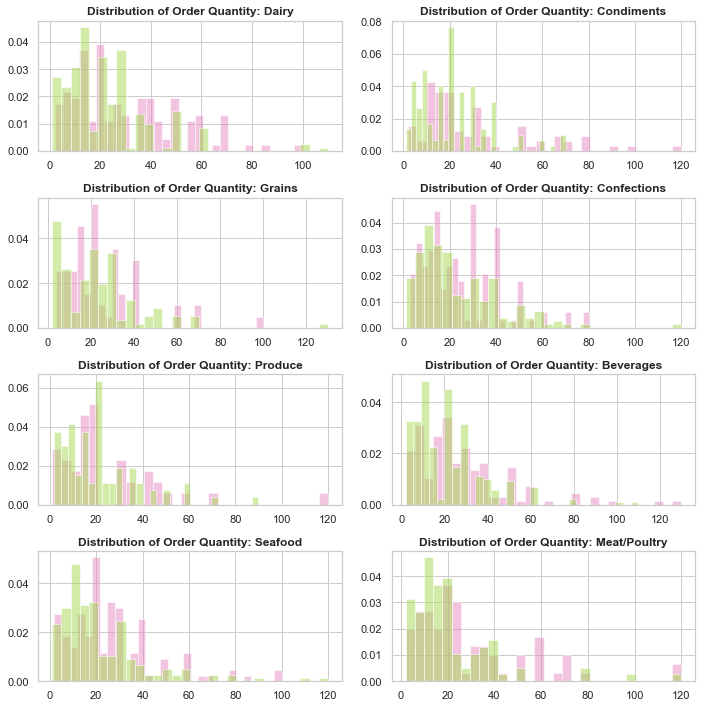

In [122]:
# Visualizing Distribution of Product Order Size with/without discounts:
sns.set_style('whitegrid')

# Creating Gridspec:
plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((4, 2), (0, 0))
ax2 = plt.subplot2grid((4, 2), (1, 0))
ax3 = plt.subplot2grid((4, 2), (2, 0))
ax4 = plt.subplot2grid((4, 2), (3, 0))
ax5 = plt.subplot2grid((4, 2), (0, 1))
ax6 = plt.subplot2grid((4, 2), (1, 1))
ax7 = plt.subplot2grid((4, 2), (2, 1))
ax8 = plt.subplot2grid((4, 2), (3, 1))

        

# Subplot 1:
ax1.hist(df_discount_category_spend_dairy_disc.Quantity, label='Discount', color='#E78AC3', alpha=.5, bins=30, density=True)
ax1.hist(df_discount_category_spend_dairy_nodisc.Quantity, label='No Discount', color='#A6D854', alpha=.5, bins=30, density=True)
ax1.set_title('Distribution of Order Quantity: Dairy', fontweight='bold')
#axes[0,0].legend(loc=1, fontsize='medium');

# Subplot 2:
ax2.hist(df_discount_category_spend_grain_disc.Quantity, label='Discount', color='#E78AC3', alpha=.5, bins=30, density=True)
ax2.hist(df_discount_category_spend_grain_nodisc.Quantity, label='No Discount', color='#A6D854', alpha=.5, bins=30, density=True)
ax2.set_title("Distribution of Order Quantity: Grains", fontsize=12, fontweight='bold')

# Subplot 3:
ax3.hist(df_discount_category_spend_produce_disc.Quantity, label='Discount', color='#E78AC3', alpha=.5, bins=30, density=True)
ax3.hist(df_discount_category_spend_produce_nodisc.Quantity, label='No Discount', color='#A6D854', alpha=.5, bins=30, density=True)
ax3.set_title("Distribution of Order Quantity: Produce", fontsize=12, fontweight='bold')

# Subplot 4:
ax4.hist(df_discount_category_spend_seafood_disc.Quantity, label='Discount', color='#E78AC3', alpha=.5, bins=30, density=True)
ax4.hist(df_discount_category_spend_seafood_nodisc.Quantity, label='No Discount', color='#A6D854', alpha=.5, bins=30, density=True)
ax4.set_title("Distribution of Order Quantity: Seafood", fontsize=12, fontweight='bold')

# Subplot 5:
ax5.hist(df_discount_category_spend_condiments_disc.Quantity, label='Discount', color='#E78AC3', alpha=.5, bins=30, density=True)
ax5.hist(df_discount_category_spend_condiments_nodisc.Quantity, label='No Discount', color='#A6D854', alpha=.5, bins=30, density=True)
ax5.set_title("Distribution of Order Quantity: Condiments", fontsize=12, fontweight='bold')

# Subplot 6:
ax6.hist(df_discount_category_spend_confections_disc.Quantity, label='Discount', color='#E78AC3', alpha=.5, bins=30, density=True)
ax6.hist(df_discount_category_spend_confections_nodisc.Quantity, label='No Discount', color='#A6D854', alpha=.5, bins=30, density=True)
ax6.set_title("Distribution of Order Quantity: Confections", fontsize=12, fontweight='bold')

# Subplot 7:
ax7.hist(df_discount_category_spend_bev_disc.Quantity, label='Discount', color='#E78AC3', alpha=.5, bins=30, density=True)
ax7.hist(df_discount_category_spend_bev_nodisc.Quantity, label='No Discount', color='#A6D854', alpha=.5, bins=30, density=True)
ax7.set_title("Distribution of Order Quantity: Beverages", fontsize=12, fontweight='bold')

# Subplot 8:
ax8.hist(df_discount_category_spend_meat_disc.Quantity, label='Discount', color='#E78AC3', alpha=.5, bins=30, density=True)
ax8.hist(df_discount_category_spend_meat_nodisc.Quantity, label='No Discount', color='#A6D854', alpha=.5, bins=30, density=True)
ax8.set_title("Distribution of Order Quantity: Meat/Poultry", fontsize=12, fontweight='bold')
plt.tight_layout()

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


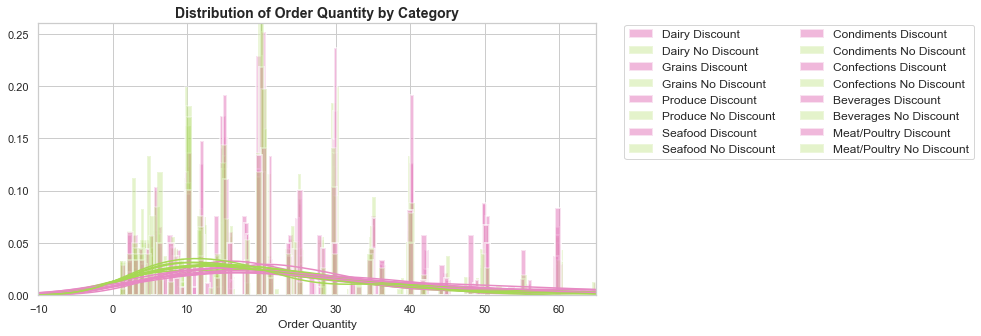

In [123]:
# Visualizing Distribution of Order Quantity with/without discounts:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,5))

# Plotting the distribution in order quantity with/without a discount:
ax = sns.distplot(df_discount_category_spend_dairy_disc.Quantity, label='Dairy Discount', color='#E78AC3', bins=150,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_discount_category_spend_dairy_nodisc.Quantity, label='Dairy No Discount', color='#A6D854', bins=150,
                  hist_kws={"linewidth": 2, "alpha": .3})

ax = sns.distplot(df_discount_category_spend_grain_disc.Quantity, label='Grains Discount', color='#E78AC3', bins=150,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_discount_category_spend_grain_nodisc.Quantity, label='Grains No Discount', color='#A6D854', bins=150,
                  hist_kws={"linewidth": 2, "alpha": .3})

ax = sns.distplot(df_discount_category_spend_produce_disc.Quantity, label='Produce Discount', color='#E78AC3', bins=150,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_discount_category_spend_produce_nodisc.Quantity, label='Produce No Discount', color='#A6D854', bins=150,
                  hist_kws={"linewidth": 2, "alpha": .3})

ax = sns.distplot(df_discount_category_spend_seafood_disc.Quantity, label='Seafood Discount', color='#E78AC3', bins=150,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_discount_category_spend_seafood_nodisc.Quantity, label='Seafood No Discount', color='#A6D854', bins=150,
                  hist_kws={"linewidth": 2, "alpha": .3})

ax = sns.distplot(df_discount_category_spend_condiments_disc.Quantity, label='Condiments Discount', color='#E78AC3', bins=150,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_discount_category_spend_condiments_nodisc.Quantity, label='Condiments No Discount', color='#A6D854', bins=150,
                  hist_kws={"linewidth": 2, "alpha": .3})

ax = sns.distplot(df_discount_category_spend_confections_disc.Quantity, label='Confections Discount', color='#E78AC3', bins=150,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_discount_category_spend_confections_nodisc.Quantity, label='Confections No Discount', color='#A6D854', bins=150,
                  hist_kws={"linewidth": 2, "alpha": .3})

ax = sns.distplot(df_discount_category_spend_bev_disc.Quantity, label='Beverages Discount', color='#E78AC3', bins=150,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_discount_category_spend_bev_nodisc.Quantity, label='Beverages No Discount', color='#A6D854', bins=150,
                  hist_kws={"linewidth": 2, "alpha": .3})

ax = sns.distplot(df_discount_category_spend_meat_disc.Quantity, label='Meat/Poultry Discount', color='#E78AC3', bins=150,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_discount_category_spend_meat_nodisc.Quantity, label='Meat/Poultry No Discount', color='#A6D854', bins=150,
                  hist_kws={"linewidth": 2, "alpha": .3})

# Labeling/Formatting:
ax.set_xlim(-10, 65)
ax.set_ylim(0, .26)
ax.set_title('Distribution of Order Quantity by Category', fontsize=14, fontweight='bold')
ax.set_xlabel('Order Quantity')
ax.legend(loc=(1.05,.5), fontsize='medium', ncol=2);

In [124]:
# Creating New DataFrames for varying Product Names:
df_log_discount_category_spend_dairy = df_log_discount_category_spend[df_discount_category_spend.CategoryName.isin(['Dairy Products'])]
df_log_discount_category_spend_grains = df_log_discount_category_spend[df_discount_category_spend.CategoryName.isin(['Grains/Cereals'])]
df_log_discount_category_spend_produce = df_log_discount_category_spend[df_discount_category_spend.CategoryName.isin(['Produce'])]
df_log_discount_category_spend_seafood = df_log_discount_category_spend[df_discount_category_spend.CategoryName.isin(['Seafood'])]
df_log_discount_category_spend_condiments = df_log_discount_category_spend[df_discount_category_spend.CategoryName.isin(['Condiments'])]
df_log_discount_category_spend_confections = df_log_discount_category_spend[df_discount_category_spend.CategoryName.isin(['Confections'])]
df_log_discount_category_spend_bev = df_log_discount_category_spend[df_discount_category_spend.CategoryName.isin(["Beverages"])]
df_log_discount_category_spend_meat = df_log_discount_category_spend[df_discount_category_spend.CategoryName.isin(['Meat/Poultry'])]

In [125]:
# Segmenting newly created DataFrames by bool Discount:
# Dairy:
query1 = 'Discount > 0'
df_log_discount_category_spend_dairy_disc = df_log_discount_category_spend_dairy.query(query1)
query2 = 'Discount == 0'
df_log_discount_category_spend_dairy_nodisc = df_log_discount_category_spend_dairy.query(query2)

# Grain:
query1 = 'Discount > 0'
df_log_discount_category_spend_grains_disc = df_log_discount_category_spend_grains.query(query1)
query2 = 'Discount == 0'
df_log_discount_category_spend_grains_nodisc = df_log_discount_category_spend_grains.query(query2)

# Produce:
query1 = 'Discount > 0'
df_log_discount_category_spend_produce_disc = df_log_discount_category_spend_produce.query(query1)
query2 = 'Discount == 0'
df_log_discount_category_spend_produce_nodisc = df_log_discount_category_spend_produce.query(query2)

# Seafood:
query1 = 'Discount > 0'
df_log_discount_category_spend_seafood_disc = df_log_discount_category_spend_seafood.query(query1)
query2 = 'Discount == 0'
df_log_discount_category_spend_seafood_nodisc = df_log_discount_category_spend_seafood.query(query2)

# Condiments:
query1 = 'Discount > 0'
df_log_discount_category_spend_condiments_disc = df_log_discount_category_spend_condiments.query(query1)
query2 = 'Discount == 0'
df_log_discount_category_spend_condiments_nodisc = df_log_discount_category_spend_condiments.query(query2)

# Confections:
query1 = 'Discount > 0'
df_log_discount_category_spend_confections_disc = df_log_discount_category_spend_confections.query(query1)
query2 = 'Discount == 0'
df_log_discount_category_spend_confections_nodisc = df_log_discount_category_spend_confections.query(query2)

# Beverages:
query1 = 'Discount > 0'
df_log_discount_category_spend_bev_disc = df_log_discount_category_spend_bev.query(query1)
query2 = 'Discount == 0'
df_log_discount_category_spend_bev_nodisc = df_log_discount_category_spend_bev.query(query2)

# Meat:
query1 = 'Discount > 0'
df_log_discount_category_spend_meat_disc = df_log_discount_category_spend_meat.query(query1)
query2 = 'Discount == 0'
df_log_discount_category_spend_meat_nodisc = df_log_discount_category_spend_meat.query(query2)

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


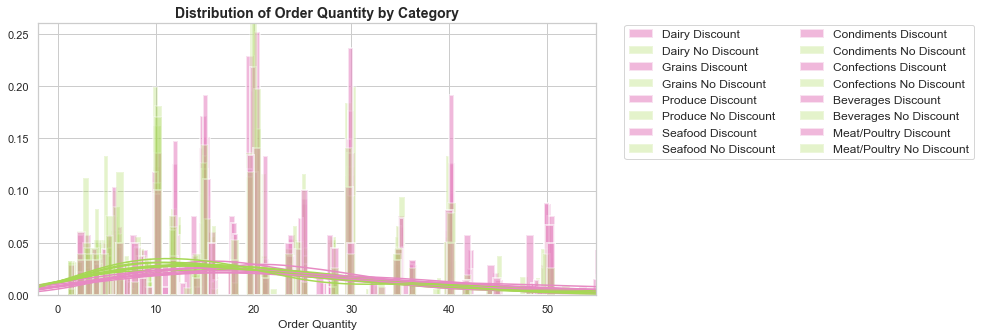

In [126]:
# Visualizing Distribution of Log Order Quantity with/without discounts:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,5))

# Plotting the distribution in order quantity with/without a discount:
ax = sns.distplot(df_log_discount_category_spend_dairy_disc.Quantity, label='Dairy Discount', color='#E78AC3', bins=150,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_log_discount_category_spend_dairy_nodisc.Quantity, label='Dairy No Discount', color='#A6D854', bins=150,
                  hist_kws={"linewidth": 2, "alpha": .3})

ax = sns.distplot(df_log_discount_category_spend_grains_disc.Quantity, label='Grains Discount', color='#E78AC3', bins=150,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_log_discount_category_spend_grains_nodisc.Quantity, label='Grains No Discount', color='#A6D854', bins=150,
                  hist_kws={"linewidth": 2, "alpha": .3})

ax = sns.distplot(df_log_discount_category_spend_produce_disc.Quantity, label='Produce Discount', color='#E78AC3', bins=150,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_log_discount_category_spend_produce_nodisc.Quantity, label='Produce No Discount', color='#A6D854', bins=150,
                  hist_kws={"linewidth": 2, "alpha": .3})

ax = sns.distplot(df_log_discount_category_spend_seafood_disc.Quantity, label='Seafood Discount', color='#E78AC3', bins=150,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_log_discount_category_spend_seafood_nodisc.Quantity, label='Seafood No Discount', color='#A6D854', bins=150,
                  hist_kws={"linewidth": 2, "alpha": .3})

ax = sns.distplot(df_log_discount_category_spend_condiments_disc.Quantity, label='Condiments Discount', color='#E78AC3', bins=150,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_log_discount_category_spend_condiments_nodisc.Quantity, label='Condiments No Discount', color='#A6D854', bins=150,
                  hist_kws={"linewidth": 2, "alpha": .3})

ax = sns.distplot(df_log_discount_category_spend_confections_disc.Quantity, label='Confections Discount', color='#E78AC3', bins=150,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_log_discount_category_spend_confections_nodisc.Quantity, label='Confections No Discount', color='#A6D854', bins=150,
                  hist_kws={"linewidth": 2, "alpha": .3})

ax = sns.distplot(df_log_discount_category_spend_bev_disc.Quantity, label='Beverages Discount', color='#E78AC3', bins=150,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_log_discount_category_spend_bev_nodisc.Quantity, label='Beverages No Discount', color='#A6D854', bins=150,
                  hist_kws={"linewidth": 2, "alpha": .3})

ax = sns.distplot(df_log_discount_category_spend_meat_disc.Quantity, label='Meat/Poultry Discount', color='#E78AC3', bins=150,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_log_discount_category_spend_meat_nodisc.Quantity, label='Meat/Poultry No Discount', color='#A6D854', bins=150,
                  hist_kws={"linewidth": 2, "alpha": .3})

# Labeling/Formatting:
ax.set_xlim(-2, 55)
ax.set_ylim(0, .26)
ax.set_title('Distribution of Order Quantity by Category', fontsize=14, fontweight='bold')
ax.set_xlabel('Order Quantity')
ax.legend(loc=(1.05,.5), fontsize='medium', ncol=2);

In [127]:
tk3 = pairwise_tukeyhsd(df_log_discount_category_spend.Quantity, df_log_discount_category_spend.CategoryName, .05)
print(tk3)

     Multiple Comparison of Means - Tukey HSD,FWER=0.05     
    group1         group2     meandiff  lower  upper  reject
------------------------------------------------------------
  Beverages      Condiments    1.0431  -3.8296 5.9159 False 
  Beverages     Confections    0.2102  -4.0656 4.4859 False 
  Beverages    Dairy Products  1.4662  -2.7021 5.6346 False 
  Beverages    Grains/Cereals -0.2094  -5.2426 4.8237 False 
  Beverages     Meat/Poultry   0.6776   -4.567 5.9222 False 
  Beverages       Produce     -1.4533  -7.1915 4.2849 False 
  Beverages       Seafood     -0.1916  -4.4817 4.0985 False 
  Condiments    Confections    -0.833  -5.8859 4.2199 False 
  Condiments   Dairy Products  0.4231  -4.5393 5.3854 False 
  Condiments   Grains/Cereals -1.2526  -6.9607 4.4555 False 
  Condiments    Meat/Poultry  -0.3655  -6.2609 5.5298 False 
  Condiments      Produce     -2.4965  -8.8349 3.842  False 
  Condiments      Seafood     -1.2348  -6.2998 3.8302 False 
 Confections   Dairy Pro

Based on the results above, we are not able to conclude that there is any significant difference between any product category. It's worth mentioning that in this test, we perform a large amount of comparisons, which can confound results.

## Is there a statistically significant difference in performance of Sales Employees at Northwind?

**4.4.1 Is total all-time revenue generated equal across all employees?**
* $H_{0}:$ There is no difference between all-time revenue generated across all employees.
<br>
* $H_{a}:$ There is a difference between all-time revenue generated across all employees.
<br>
* $\alpha$ = 0.05

In [128]:
df_employee.columns

Index(['Id', 'LastName', 'FirstName', 'Title', 'TitleOfCourtesy', 'BirthDate',
       'HireDate', 'Address', 'City', 'Region', 'PostalCode', 'Country',
       'HomePhone', 'Extension', 'Photo', 'Notes', 'ReportsTo', 'PhotoPath'],
      dtype='object')

In [129]:
df_employee_sales_overview = pd.read_sql_query("""SELECT e.Id, e.LastName, e.Title, e.HireDate, \
            SUM(od.Quantity * od.UnitPrice * (1-od.Discount)) TotalRev\
            FROM [OrderDetail] od \
            INNER JOIN [Order] o on o.Id = od.OrderId \
            INNER JOIN [Employee] e on e.Id = o.EmployeeId \
            GROUP BY e.LastName \
            ORDER BY e.LastName DESC""", engine)
print(len(df_employee_sales_overview))
df_employee_sales_overview.head(50)

2019-06-24 21:25:04,062 INFO sqlalchemy.engine.base.Engine SELECT e.Id, e.LastName, e.Title, e.HireDate,             SUM(od.Quantity * od.UnitPrice * (1-od.Discount)) TotalRev            FROM [OrderDetail] od             INNER JOIN [Order] o on o.Id = od.OrderId             INNER JOIN [Employee] e on e.Id = o.EmployeeId             GROUP BY e.LastName             ORDER BY e.LastName DESC
2019-06-24 21:25:04,063 INFO sqlalchemy.engine.base.Engine ()
9


,Id,LastName,Title,HireDate,TotalRev
0,6,Suyama,Sales Representative,2025-10-17,73913.1295
1,4,Peacock,Sales Representative,2025-05-03,232890.8460
2,3,Leverling,Sales Representative,2024-04-01,202812.8430
3,7,King,Sales Representative,2026-01-02,124568.2350
4,2,Fuller,"Vice President, Sales",2024-08-14,166537.7550
5,9,Dodsworth,Sales Representative,2026-11-15,77308.0665
6,1,Davolio,Sales Representative,2024-05-01,192107.6045
7,8,Callahan,Inside Sales Coordinator,2026-03-05,126862.2775
8,5,Buchanan,Sales Manager,2025-10-17,68792.2825


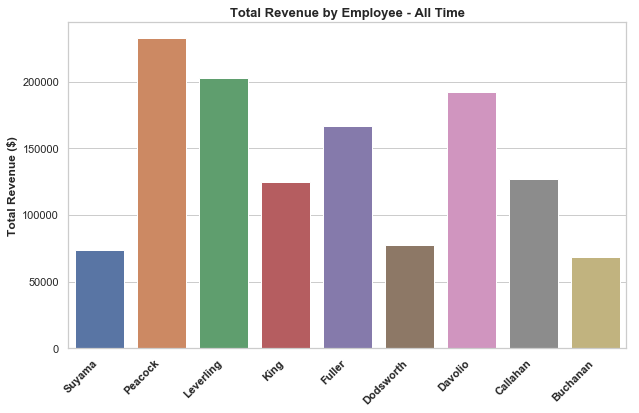

In [130]:
# Plotting to compare sales totals by Employee:
sns.set_style('whitegrid')
sns.set_color_codes='Set2'

fig, ax = plt.subplots()

sns.barplot(x=df_employee_sales_overview.LastName, y=df_employee_sales_overview.TotalRev)

ax.set_title('Total Revenue by Employee - All Time', fontsize=13, fontweight='semibold')
ax.set_xlabel('')
ax.set_ylabel('Total Revenue ($)', fontweight='semibold')
plt.xticks(rotation=45, ha='right', fontweight='semibold')

fig.savefig('TotalRevenueByEmp.png', bbox_inches='tight')
plt.show()

Ranking the employees in the Sales Team by revenue generated (TotalRev) is only a sigificant measure given the context of how long each employee has worked for Northwind. However, as seen above, the hire date for all employees does not match the period from 2012-2014 in which this data was recorded.

For this reason, it's likely more productive to view differences in 2014 YTD revenue generated for each employee and YoY revenue generated by Northwind as a whole. Also worth mentioning is that there are 3 basic "levels" of employee seniority (Sales Rep, Manager, VP) included. Because we do not have information regarding employee salary as well as other KPIs these employees may be accountable for, a direct comparison of revenue generated is likely not fully representitive of employee performance. 

In [131]:
df_employee_sales = pd.read_sql_query("""SELECT e.Id, e.LastName, e.Title, o.OrderDate, \
            (od.Quantity * od.UnitPrice * (1-od.Discount)) TotalRev\
            FROM [OrderDetail] od \
            INNER JOIN [Order] o on o.Id = od.OrderId \
            INNER JOIN [Employee] e on e.Id = o.EmployeeId;""", engine)
print(len(df_employee_sales))
df_employee_sales.head()

2019-06-24 21:25:04,414 INFO sqlalchemy.engine.base.Engine SELECT e.Id, e.LastName, e.Title, o.OrderDate,             (od.Quantity * od.UnitPrice * (1-od.Discount)) TotalRev            FROM [OrderDetail] od             INNER JOIN [Order] o on o.Id = od.OrderId             INNER JOIN [Employee] e on e.Id = o.EmployeeId;
2019-06-24 21:25:04,415 INFO sqlalchemy.engine.base.Engine ()
2155


,Id,LastName,Title,OrderDate,TotalRev
0,5,Buchanan,Sales Manager,2012-07-04,168.0
1,5,Buchanan,Sales Manager,2012-07-04,98.0
2,5,Buchanan,Sales Manager,2012-07-04,174.0
3,6,Suyama,Sales Representative,2012-07-05,167.4
4,6,Suyama,Sales Representative,2012-07-05,1696.0


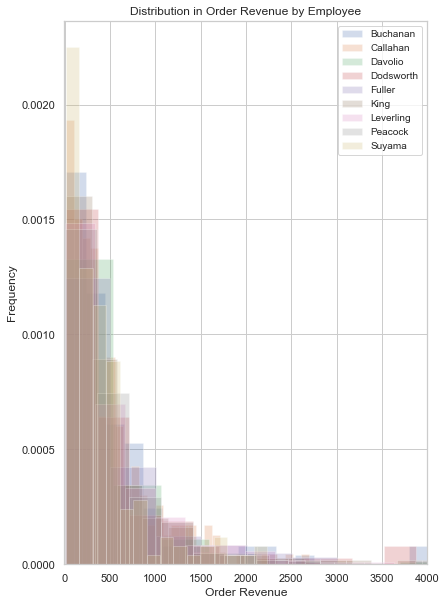

In [132]:
fig, ax = plt.subplots(figsize=(6.5,10))
sns.set_style('whitegrid')
sns.set_palette('Set2')

df_employee_sales.groupby('LastName')['TotalRev'].plot(kind='hist', alpha=.25, bins=30, ax=ax, density=True)

ax.set_title('Distribution in Order Revenue by Employee')
ax.set_xlabel('Order Revenue')
ax.set_xlim(-2, 4000)
ax.legend(ncol=1, fontsize='small');

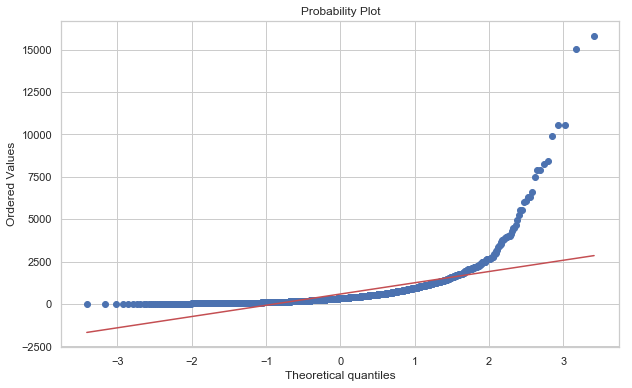

In [133]:
# Visualizing Distribution:
stats.probplot(df_employee_sales.TotalRev, plot = plt),
plt.show()

In [134]:
# Log Scaling OrderPrice:
df_log_employee_sales = df_employee_sales.copy()
#LogDiscountPrice = np.log(df_employee_sales.OrderPrice)
df_log_employee_sales['LogTotalRev'] = np.log(df_employee_sales.TotalRev)
df_log_employee_sales.head()

,Id,LastName,Title,OrderDate,TotalRev,LogTotalRev
0,5,Buchanan,Sales Manager,2012-07-04,168.0,5.123964
1,5,Buchanan,Sales Manager,2012-07-04,98.0,4.584967
2,5,Buchanan,Sales Manager,2012-07-04,174.0,5.159055
3,6,Suyama,Sales Representative,2012-07-05,167.4,5.120386
4,6,Suyama,Sales Representative,2012-07-05,1696.0,7.436028


In [135]:
df_employee_sales.groupby('LastName')['TotalRev'].describe()

,count,mean,std,min,25%,50%,75%,max
LastName,,,,,,,,
Buchanan,117.0,587.968226,845.989352,20.25,180.000000,336.000,660.00,6324.00
Callahan,260.0,487.931837,481.205577,13.50,147.150000,311.340,635.00,2700.00
Davolio,345.0,556.833636,1046.678504,8.50,120.000000,306.375,640.00,15810.00
Dodsworth,107.0,722.505294,1317.878865,12.50,167.500000,323.000,703.80,10540.00
Fuller,241.0,691.028029,1268.353358,4.80,145.600000,399.000,709.65,15019.50
King,176.0,707.774063,1190.981650,16.00,163.640625,366.400,685.80,8432.00
Leverling,321.0,631.815710,1015.899688,8.64,144.000000,347.200,776.70,9903.20
Peacock,420.0,554.502014,835.402851,7.30,157.190000,349.375,621.00,10540.00
Suyama,168.0,439.959104,534.870300,16.00,120.000000,285.750,525.75,4456.44


In [136]:
df_log_employee_sales.groupby('LastName')['LogTotalRev'].describe()

,count,mean,std,min,25%,50%,75%,max
LastName,,,,,,,,
Buchanan,117.0,5.807539,1.063321,3.008155,5.192957,5.817111,6.492240,8.752107
Callahan,260.0,5.707344,1.059273,2.602690,4.991452,5.740883,6.453533,7.901007
Davolio,345.0,5.604662,1.249448,2.140066,4.787492,5.724810,6.461468,9.668398
Dodsworth,107.0,5.815776,1.221841,2.525729,5.118191,5.777652,6.556389,9.262933
Fuller,241.0,5.813449,1.235418,1.568616,4.980863,5.988961,6.564772,9.617105
King,176.0,5.838798,1.179683,2.772589,5.097665,5.903716,6.530576,9.039789
Leverling,321.0,5.804188,1.133329,2.156403,4.969813,5.849901,6.655054,9.200613
Peacock,420.0,5.719198,1.145703,1.987874,5.057454,5.856144,6.431327,9.262933
Suyama,168.0,5.556535,1.068055,2.772589,4.787492,5.655086,6.264823,8.402106


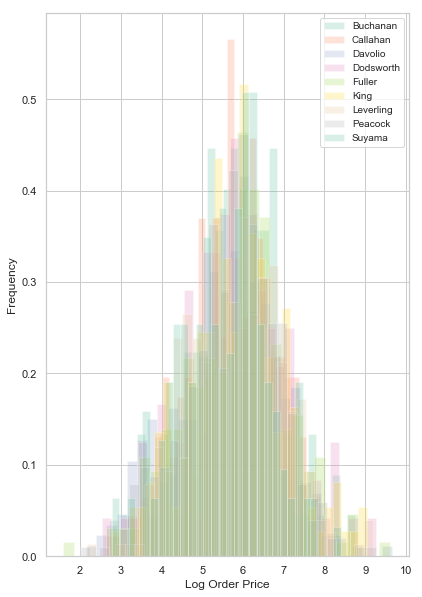

In [137]:
fig, ax = plt.subplots(figsize=(6.5,10))
sns.set_style('whitegrid')
sns.set_palette('Set2')

df_log_employee_sales.groupby('LastName')['LogTotalRev'].plot(kind='hist', alpha=.25, bins=30, ax=ax, density=True)

#ax.set_xticklabels(df_log_employee_sales.LastName)
ax.set_xlabel('Log Order Price')
ax.legend(ncol=1, fontsize='small');
#plt.xticks(rotation=90);

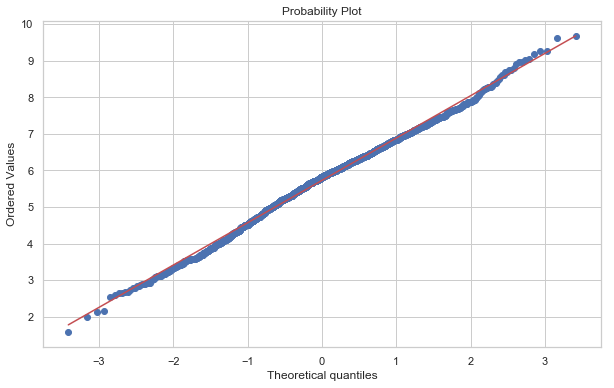

In [138]:
# Visualizing Distribution:
stats.probplot(df_log_employee_sales.LogTotalRev, plot = plt),
plt.show()

In [139]:
tk4 = pairwise_tukeyhsd(df_log_employee_sales.LogTotalRev, df_log_employee_sales.LastName, .05)
print(tk4)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower  upper  reject
--------------------------------------------------
 Buchanan  Callahan -0.1002  -0.5005 0.3001 False 
 Buchanan  Davolio  -0.2029  -0.5876 0.1818 False 
 Buchanan Dodsworth  0.0082  -0.4728 0.4892 False 
 Buchanan   Fuller   0.0059  -0.3993 0.4111 False 
 Buchanan    King    0.0313  -0.3977 0.4602 False 
 Buchanan Leverling -0.0034  -0.3917 0.385  False 
 Buchanan  Peacock  -0.0883  -0.4642 0.2876 False 
 Buchanan   Suyama   -0.251   -0.684 0.182  False 
 Callahan  Davolio  -0.1027   -0.398 0.1926 False 
 Callahan Dodsworth  0.1084  -0.3046 0.5214 False 
 Callahan   Fuller   0.1061  -0.2154 0.4276 False 
 Callahan    King    0.1315  -0.2195 0.4825 False 
 Callahan Leverling  0.0968  -0.2032 0.3969 False 
 Callahan  Peacock   0.0119  -0.2719 0.2956 False 
 Callahan   Suyama  -0.1508  -0.5068 0.2051 False 
 Davolio  Dodsworth  0.2111  -0.1868 0.609  False 
 Davolio    Fuller   0.2088  -0

**4.4.1 Is total all-time revenue generated equal across all employees?**
* $H_{0}:$ There is no difference between all-time revenue generated across all employees.
<br>
* $H_{a}:$ There is a difference between all-time revenue generated across all employees.
<br>
* $\alpha$ = 0.05

Based on the results of the Tukey Test above, we fail to reject the null hypothesis that there is a statistically significant difference between total all-time revenue generated for any 2 employees.

However, we still don't have details on how long each employee has worked at Northwind. Let's repeat a similar test to determine investigate relationships between average sales per employee in 2014.

**4.4.2 Is average Order Revenue equal across all employees in 2014?**
* $H_{0}:$ There is no difference in average Order Revenue generated across all employees in 2014.
<br>
* $H_{a}:$ There is a difference in average Order Revenue generated across all employees in 2014.
<br>
* $\alpha$ = 0.05

In [140]:
df_employee_sales_2013 = pd.read_sql_query("""SELECT e.LastName, \
            SUM((od.Quantity * od.UnitPrice * (1-od.Discount))) OrderTotal, 
            COUNT(od.Id) OrderCount
            FROM [OrderDetail] od \
            INNER JOIN [Order] o on o.Id = od.OrderId \
            INNER JOIN [Employee] e on e.Id = o.EmployeeId
            WHERE o.OrderDate LIKE "2013%"
            GROUP BY e.LastName \
            ORDER BY OrderTotal DESC;""", engine)

df_employee_sales_2013.head(10)

2019-06-24 21:25:07,006 INFO sqlalchemy.engine.base.Engine SELECT e.LastName,             SUM((od.Quantity * od.UnitPrice * (1-od.Discount))) OrderTotal, 
            COUNT(od.Id) OrderCount
            FROM [OrderDetail] od             INNER JOIN [Order] o on o.Id = od.OrderId             INNER JOIN [Employee] e on e.Id = o.EmployeeId
            WHERE o.OrderDate LIKE "2013%"
            GROUP BY e.LastName             ORDER BY OrderTotal DESC;
2019-06-24 21:25:07,007 INFO sqlalchemy.engine.base.Engine ()


,LastName,OrderTotal,OrderCount
0,Peacock,128809.7910,218
1,Leverling,108026.1555,184
2,Davolio,93148.0775,156
3,Fuller,70444.1400,102
4,King,60471.1950,91
5,Callahan,56032.6150,124
6,Suyama,43126.3695,86
7,Buchanan,30716.4675,53
8,Dodsworth,26310.3925,45


In [141]:
df_employee_sales_2013['OrderAvg'] = df_employee_sales_2013.OrderTotal/df_employee_sales_2013.OrderCount
df_employee_sales_2013.head()

,LastName,OrderTotal,OrderCount,OrderAvg
0,Peacock,128809.7910,218,590.870601
1,Leverling,108026.1555,184,587.098671
2,Davolio,93148.0775,156,597.103061
3,Fuller,70444.1400,102,690.628824
4,King,60471.1950,91,664.518626


In [142]:
df_employee_sales_2014 = pd.read_sql_query("""SELECT e.LastName, \
            (od.Quantity * od.UnitPrice * (1-od.Discount)) OrderTotal 
            FROM [OrderDetail] od \
            INNER JOIN [Order] o on o.Id = od.OrderId \
            INNER JOIN [Employee] e on e.Id = o.EmployeeId
            WHERE o.OrderDate LIKE "2014%";""", engine)

df_employee_sales_2014.head(10)

2019-06-24 21:25:07,031 INFO sqlalchemy.engine.base.Engine SELECT e.LastName,             (od.Quantity * od.UnitPrice * (1-od.Discount)) OrderTotal 
            FROM [OrderDetail] od             INNER JOIN [Order] o on o.Id = od.OrderId             INNER JOIN [Employee] e on e.Id = o.EmployeeId
            WHERE o.OrderDate LIKE "2014%";
2019-06-24 21:25:07,032 INFO sqlalchemy.engine.base.Engine ()


,LastName,OrderTotal
0,Fuller,646.0
1,Fuller,765.0
2,King,140.0
3,Fuller,42.0
4,Fuller,70.0
5,Fuller,75.0
6,Callahan,138.0
7,Callahan,162.0
8,Callahan,552.0
9,Buchanan,180.0


In [143]:
df_employee_sales_2014_overview = pd.read_sql_query("""SELECT e.LastName, \
            SUM(od.Quantity * od.UnitPrice * (1-od.Discount)) OrderTotal 
            FROM [OrderDetail] od \
            INNER JOIN [Order] o on o.Id = od.OrderId \
            INNER JOIN [Employee] e on e.Id = o.EmployeeId
            WHERE o.OrderDate LIKE "2014%" \
            GROUP BY e.LastName \
            ORDER BY e.LastName DESC;""", engine)

df_employee_sales_2014_overview.head(10)

2019-06-24 21:25:07,047 INFO sqlalchemy.engine.base.Engine SELECT e.LastName,             SUM(od.Quantity * od.UnitPrice * (1-od.Discount)) OrderTotal 
            FROM [OrderDetail] od             INNER JOIN [Order] o on o.Id = od.OrderId             INNER JOIN [Employee] e on e.Id = o.EmployeeId
            WHERE o.OrderDate LIKE "2014%"             GROUP BY e.LastName             ORDER BY e.LastName DESC;
2019-06-24 21:25:07,048 INFO sqlalchemy.engine.base.Engine ()


,LastName,OrderTotal
0,Suyama,14144.1550
1,Peacock,54135.9400
2,Leverling,76562.7275
3,King,48864.8800
4,Fuller,74336.5550
5,Dodsworth,41103.1590
6,Davolio,63195.0120
7,Callahan,48589.5425
8,Buchanan,19691.8950


In [144]:
df_employee_sales_2014.OrderTotal.describe()

count      691.000000
mean       637.661166
std       1250.455796
min          8.500000
25%        144.000000
50%        348.000000
75%        672.500000
max      15810.000000
Name: OrderTotal, dtype: float64

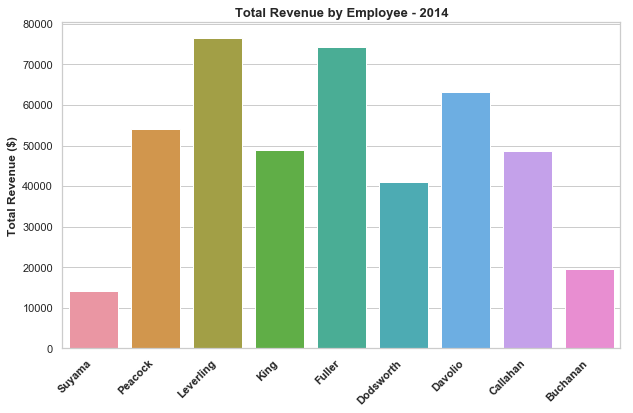

In [145]:
# Plotting to compare 2014 sales totals by Employee:
sns.set_style('whitegrid')
sns.set_color_codes='Set2'

fig, ax = plt.subplots()

sns.barplot(x=df_employee_sales_2014_overview.LastName, y=df_employee_sales_2014_overview.OrderTotal)

ax.set_title('Total Revenue by Employee - 2014', fontsize=13, fontweight='semibold')
ax.set_xlabel('')
ax.set_ylabel('Total Revenue ($)', fontweight='semibold')
plt.xticks(rotation=45, ha='right', fontweight='semibold')

fig.savefig('TotalRevenueByEmp2014.png', bbox_inches='tight')
plt.show()

In [146]:
tk5 = pairwise_tukeyhsd(df_employee_sales_2014.OrderTotal, df_employee_sales_2014.LastName, 0.05)
print(tk5)


#pairwise_tukeyhsd(df_log_discount_category_spend.Quantity, df_log_discount_category_spend.CategoryName, .05)

    Multiple Comparison of Means - Tukey HSD,FWER=0.05   
  group1    group2   meandiff   lower      upper   reject
---------------------------------------------------------
 Buchanan  Callahan  26.2871   -735.675   788.2492 False 
 Buchanan  Davolio   -1.1629  -731.9164   729.5907 False 
 Buchanan Dodsworth  361.3336 -495.9851  1218.6522 False 
 Buchanan   Fuller   218.6609 -529.3949   966.7167 False 
 Buchanan    King    282.2013 -529.3059  1093.7085 False 
 Buchanan Leverling  282.2837 -471.1653  1035.7327 False 
 Buchanan  Peacock   -16.633  -758.8513   725.5853 False 
 Buchanan   Suyama  -210.7553 -1076.7163  655.2056 False 
 Callahan  Davolio    -27.45  -575.0753   520.1753 False 
 Callahan Dodsworth  335.0464 -372.6879  1042.7808 False 
 Callahan   Fuller   192.3738 -378.1349   762.8825 False 
 Callahan    King    255.9142 -395.5738   907.4022 False 
 Callahan Leverling  255.9966 -321.5656   833.5588 False 
 Callahan  Peacock   -42.9201 -605.7528   519.9126 False 
 Callahan   Su

## YoY Revenue:

**4.5.1 Is Q1 Order Revenue for 2014 significantly greater than Q1 Order Revenue from 2013?**
* $H_{0}:$ Average Order Revenue for Q1 2014 is not greater than that of 2013.
<br>
* $H_{a}:$ Average Order Revenue for Q1 2014 is greater than that of 2013.
<br>
* $\alpha$ = 0.05

*Note: As we're seeking to determine whether one value is greater than the other, we'll use a one-tailed test.*

In [147]:
df_ttm = pd.read_sql_query("""SELECT o.ID, o.OrderDate, od.UnitPrice, od.Quantity, od.Discount \
            FROM [Order] o \
            INNER JOIN [OrderDetail] od on od.OrderId = o.ID;""", engine)
df_ttm.head(8)

2019-06-24 21:25:07,406 INFO sqlalchemy.engine.base.Engine SELECT o.ID, o.OrderDate, od.UnitPrice, od.Quantity, od.Discount             FROM [Order] o             INNER JOIN [OrderDetail] od on od.OrderId = o.ID;
2019-06-24 21:25:07,407 INFO sqlalchemy.engine.base.Engine ()


,Id,OrderDate,UnitPrice,Quantity,Discount
0,10248,2012-07-04,14.0,12,0.00
1,10248,2012-07-04,9.8,10,0.00
2,10248,2012-07-04,34.8,5,0.00
3,10249,2012-07-05,18.6,9,0.00
4,10249,2012-07-05,42.4,40,0.00
5,10250,2012-07-08,7.7,10,0.00
6,10250,2012-07-08,42.4,35,0.15
7,10250,2012-07-08,16.8,15,0.15


In [148]:
# Multiplying UnitPrice by Discount and Quantity to obtain total order price:
#df_discount_spend['OrderPrice'] = 
discount_list3 = df_ttm.Discount
unitprice_list3 = df_ttm.UnitPrice
quantity_list3 = df_ttm.Quantity
#quantity_per_unit_list = df_discount_spend.QuantityPerUnitEdit

# Making sure discounts are applied where applicable:
OrderPrice3 = order_cost_calc(discount_list3, unitprice_list3, quantity_list3, new_list=[])
print(OrderPrice3[:8]) # Value of OrderPrice[7] confirms correct application of discount.
print(len(OrderPrice3))

[168.0, 98.0, 174.0, 167.4, 1696.0, 77.0, 1261.3999999999999, 214.2]
2155


In [149]:
# Inserting new column 'OrderPrice' into DataFrame:
df_ttm['OrderPrice'] = np.array(OrderPrice3)
df_ttm.head()

,Id,OrderDate,UnitPrice,Quantity,Discount,OrderPrice
0,10248,2012-07-04,14.0,12,0.0,168.0
1,10248,2012-07-04,9.8,10,0.0,98.0
2,10248,2012-07-04,34.8,5,0.0,174.0
3,10249,2012-07-05,18.6,9,0.0,167.4
4,10249,2012-07-05,42.4,40,0.0,1696.0


In [150]:
df_ttm.OrderDate.iloc[0]

'2012-07-04'

In [151]:
df_ttm['DateList'] = df_ttm['OrderDate'].apply(lambda x: (x.split('-')))
df_ttm[['Year', 'Month', 'Day']] = pd.DataFrame(df_ttm.DateList.values.tolist(), index=df_ttm.index)
df_ttm.drop(['DateList'], axis=1, inplace=True)
df_ttm.head()

,Id,OrderDate,UnitPrice,Quantity,Discount,OrderPrice,Year,Month,Day
0,10248,2012-07-04,14.0,12,0.0,168.0,2012,07,04
1,10248,2012-07-04,9.8,10,0.0,98.0,2012,07,04
2,10248,2012-07-04,34.8,5,0.0,174.0,2012,07,04
3,10249,2012-07-05,18.6,9,0.0,167.4,2012,07,05
4,10249,2012-07-05,42.4,40,0.0,1696.0,2012,07,05


In [152]:
import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker

In [153]:
df_revenue_2012 = df_ttm[df_ttm.Year.isin(['2012'])]
df_revenue_2013 = df_ttm[df_ttm.Year.isin(['2013'])]
df_revenue_2014 = df_ttm[df_ttm.Year.isin(['2014'])]

In [154]:
df_revenue_2012.head()

,Id,OrderDate,UnitPrice,Quantity,Discount,OrderPrice,Year,Month,Day
0,10248,2012-07-04,14.0,12,0.0,168.0,2012,07,04
1,10248,2012-07-04,9.8,10,0.0,98.0,2012,07,04
2,10248,2012-07-04,34.8,5,0.0,174.0,2012,07,04
3,10249,2012-07-05,18.6,9,0.0,167.4,2012,07,05
4,10249,2012-07-05,42.4,40,0.0,1696.0,2012,07,05


In [155]:
df_revenue_2012.Month.unique()

array(['07', '08', '09', '10', '11', '12'], dtype=object)

In [156]:
df_revenue_2013.Month.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [157]:
df_revenue_2013.describe()

,Id,UnitPrice,Quantity,Discount,OrderPrice
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,10601.432483,26.076563,24.068933,0.059301,582.705575
std,117.268768,28.580862,19.040946,0.084116,824.299864
min,10400.000000,2.000000,1.000000,0.000000,4.800000
25%,10502.500000,12.500000,10.000000,0.000000,155.000000
50%,10601.000000,18.600000,20.000000,0.000000,340.000000
75%,10703.000000,32.800000,30.000000,0.100000,696.250000
max,10807.000000,263.500000,130.000000,0.250000,10540.000000


In [158]:
df_revenue_2014.Month.unique()

array(['01', '02', '03', '04', '05'], dtype=object)

In [159]:
df_revenue_2014.describe()

,Id,UnitPrice,Quantity,Discount,OrderPrice
count,691.000000,691.000000,691.000000,691.000000,691.000000
mean,10945.027496,28.184703,23.512301,0.053169,637.661166
std,81.089005,33.284722,19.605258,0.083972,1250.455796
min,10808.000000,2.500000,1.000000,0.000000,8.500000
25%,10871.000000,12.500000,10.000000,0.000000,144.000000
50%,10945.000000,19.000000,20.000000,0.000000,348.000000
75%,11015.000000,33.625000,30.000000,0.100000,672.500000
max,11077.000000,263.500000,130.000000,0.250000,15810.000000


In [160]:
# Reviewing Monthly Sales in 2014
print(max(df_revenue_2014.OrderDate)) # Checking date of last order placed
df_revenue_2014.groupby(['Month'])['OrderPrice'].sum()

2014-05-06


Month
01     94222.1105
02     99415.2875
03    104854.1550
04    123798.6825
05     18333.6305
Name: OrderPrice, dtype: float64

As shown above, the last recorded sale in the dataset ocurred on 2014-05-06. Because this range represents less than than 25% of the days in the Month of May, a direct comparison of revenue between May of 2013/2014 is not possible.

Instead, we'll compare the revenue from Q1 2014 with Q1 2013.

In [161]:
df_revenue_2014_q1 = df_revenue_2014.copy()
df_revenue_2014_q1 = df_revenue_2014[df_revenue_2014.Month != '05']
print(len(df_revenue_2014))
print(len(df_revenue_2014_q1))
df_revenue_2014_q1.describe()

691
632


,Id,UnitPrice,Quantity,Discount,OrderPrice
count,632.000000,632.000000,632.000000,632.000000,632.000000
mean,10933.098101,28.871187,24.250000,0.052215,668.180752
std,74.288852,34.500475,19.249653,0.084231,1287.556400
min,10808.000000,2.500000,1.000000,0.000000,8.500000
25%,10865.750000,12.687500,10.000000,0.000000,168.750000
50%,10932.500000,19.450000,20.000000,0.000000,368.528750
75%,10999.000000,34.000000,30.000000,0.100000,716.625000
max,11063.000000,263.500000,120.000000,0.250000,15810.000000


In [162]:
df_revenue_2013_q1 = df_revenue_2013.copy()
df_revenue_2013_q1 = df_revenue_2013[df_revenue_2013.Month < '05']
print(len(df_revenue_2013_q1))
df_revenue_2013_q1.Month.unique()

322


array(['01', '02', '03', '04'], dtype=object)

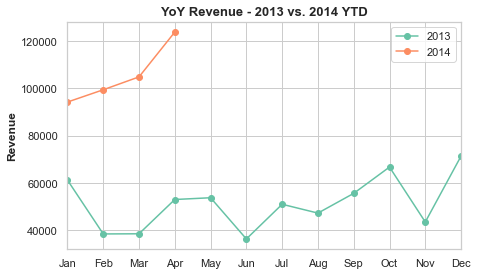

In [175]:
fig, ax = plt.subplots(figsize=(8,4), sharex=False)
sns.set_style('whitegrid')
sns.set_palette('Set2')

a = df_revenue_2013.groupby(['Month'])['OrderPrice'].sum().plot(kind='line', ax=ax, label='2013', marker='o')
b = df_revenue_2014_q1.groupby(['Month'])['OrderPrice'].sum().plot(kind='line', ax=ax, label='2014', marker='o')

ax.set_title('YoY Revenue - 2013 vs. 2014 YTD', fontsize=13, fontweight='semibold')
ticklabels = [datetime.date(2014, month, 12).strftime('%b') for month in range(1,13)]
ax.set_xticks(np.arange(0,12))
ax.set_xlim(0,11)
ax.set_xticklabels(ticklabels) #add monthlabels to the xaxis
ax.set_xlabel('')
ax.set_ylabel('Revenue', fontweight='semibold')

ax.legend(['2013', '2014'], loc=1) #add the column names as legend.

fig.savefig('YoY_Rev_2013v2014.png', bbox_inches='tight')

plt.tight_layout(rect=[0, 0, 0.85, 1])

As shown above, Northwind's 2014 Q1 monthly revenue is much greater than that of 2013. However, it's also important to note that there were 632 orders placed in Q1 of 2014 while there were only 322 orders placed in Q1 of 2014.

For this reason, we'll compare the average Order Revenue from each sample.

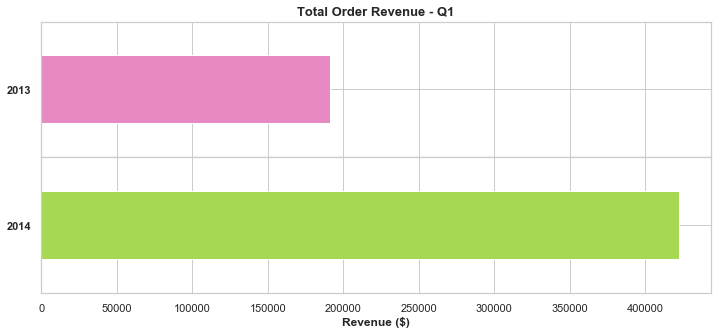

In [164]:
# Visualizing Q1 Sales Data:
sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 1, figsize=(12,5), sharex=True, sharey=False)

# Grouping DataFrame for visualization:
df_revenue_2013_q1.groupby(['Year'])['OrderPrice'].sum().plot(kind='barh', ax=axes[0], color='#E78AC3')
df_revenue_2014_q1.groupby(['Year'])['OrderPrice'].sum().plot(kind='barh', ax=axes[1], color='#A6D854')

# Subplot 1 Labels:
axes[0].set_title('Total Order Revenue - Q1', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Revenue ($)', fontweight='semibold')
axes[0].set_ylabel('')
axes[0].set_yticklabels(['2013'], fontweight='semibold')

#Subplot 2 Labels:
axes[1].set_xlabel('Revenue ($)', fontweight='semibold')
axes[1].set_ylabel('')
axes[1].set_yticklabels(['2014'], fontweight='semibold')
fig.subplots_adjust(hspace=0)

fig.savefig('tot_order_rev_Q1.png', bbox_inches='tight')
plt.show()

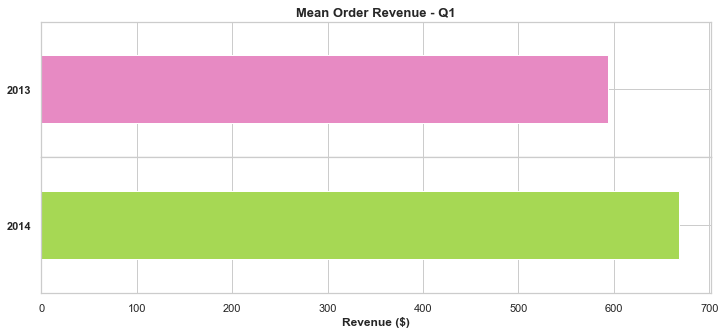

In [165]:
# Visualizing Q1 Sales Data:
sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 1, figsize=(12,5), sharex=True, sharey=False)

# Grouping DataFrame for visualization:
df_revenue_2013_q1.groupby(['Year'])['OrderPrice'].mean().plot(kind='barh', ax=axes[0], color='#E78AC3')
df_revenue_2014_q1.groupby(['Year'])['OrderPrice'].mean().plot(kind='barh', ax=axes[1], color='#A6D854')

# Subplot 1 Labels:
axes[0].set_title('Mean Order Revenue - Q1', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Revenue ($)', fontweight='semibold')
axes[0].set_ylabel('')
axes[0].set_yticklabels(['2013'], fontweight='semibold')

#Subplot 2 Labels:
axes[1].set_xlabel('Revenue ($)', fontweight='semibold')
axes[1].set_ylabel('')
axes[1].set_yticklabels(['2014'], fontweight='semibold')
fig.subplots_adjust(hspace=0)

fig.savefig('Avg_order_rev_q1.png', bbox_inches='tight')
plt.show()

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


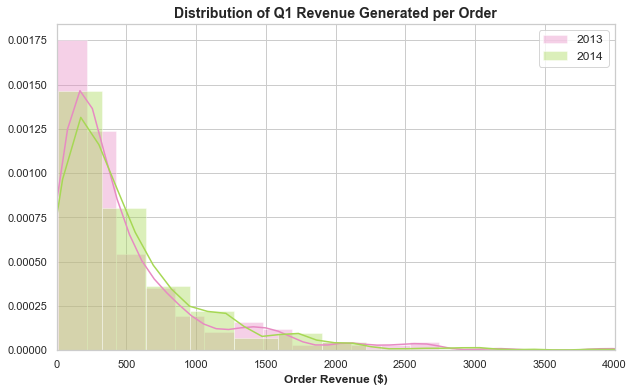

In [166]:
# Visualizing Distribution of Mean Q1 Order Revenue:
sns.set_style('whitegrid')

# Plotting distributions:
ax = sns.distplot(df_revenue_2013_q1.OrderPrice, label='2013', color='#E78AC3')
ax = sns.distplot(df_revenue_2014_q1.OrderPrice, label='2014', color='#A6D854')

# Label/Format:
ax.set_xlim(0, 4000)
ax.set_xlabel('Order Revenue ($)', fontweight='semibold')
ax.set_title('Distribution of Q1 Revenue Generated per Order', fontsize=14, fontweight='bold')
ax.legend(loc=1, fontsize='medium');

In [167]:
# Log Scaling OrderPrice:
df_log_revenue_2013_q1 = df_revenue_2013_q1.copy()
df_log_revenue_2014_q1 = df_revenue_2014_q1.copy()

LogOrderPrice13 = np.log(df_log_revenue_2013_q1.OrderPrice)
LogOrderPrice14 = np.log(df_log_revenue_2014_q1.OrderPrice)

df_log_revenue_2013_q1['LogTotalRev'] = np.log(df_log_revenue_2013_q1.OrderPrice)
df_log_revenue_2014_q1['LogTotalRev'] = np.log(df_log_revenue_2014_q1.OrderPrice)

In [168]:
df_log_revenue_2013_q1.head()

,Id,OrderDate,UnitPrice,Quantity,Discount,OrderPrice,Year,Month,Day,LogTotalRev
405,10400,2013-01-01,99.0,21,0.0,2079.0,2013,01,01,7.639642
406,10400,2013-01-01,14.4,35,0.0,504.0,2013,01,01,6.222576
407,10400,2013-01-01,16.0,30,0.0,480.0,2013,01,01,6.173786
408,10401,2013-01-01,20.7,18,0.0,372.6,2013,01,01,5.920505
409,10401,2013-01-01,30.4,70,0.0,2128.0,2013,01,01,7.662938


In [169]:
df_log_revenue_2014_q1.head()

,Id,OrderDate,UnitPrice,Quantity,Discount,OrderPrice,Year,Month,Day,LogTotalRev
1464,10808,2014-01-01,38.0,20,0.15,646.0,2014,01,01,6.470800
1465,10808,2014-01-01,18.0,50,0.15,765.0,2014,01,01,6.639876
1466,10809,2014-01-01,7.0,20,0.00,140.0,2014,01,01,4.941642
1467,10810,2014-01-01,6.0,7,0.00,42.0,2014,01,01,3.737670
1468,10810,2014-01-01,14.0,5,0.00,70.0,2014,01,01,4.248495


/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


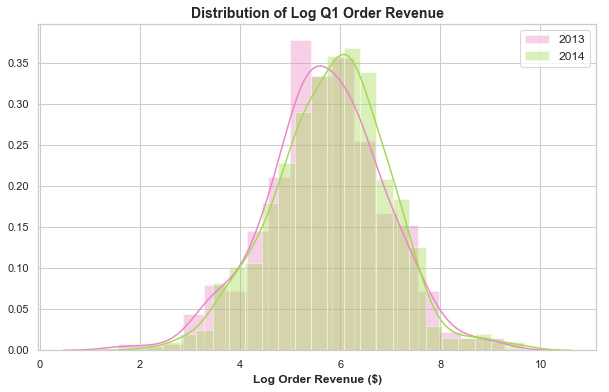

In [170]:
# Visualizing Distribution of Mean Q1 Order Revenue:
sns.set_style('whitegrid')

# Plotting distributions:
ax = sns.distplot(df_log_revenue_2013_q1.LogTotalRev, label='2013', color='#E78AC3')
ax = sns.distplot(df_log_revenue_2014_q1.LogTotalRev, label='2014', color='#A6D854')

# Label/Format:
ax.set_xlabel('Log Order Revenue ($)', fontweight='semibold')
ax.set_title('Distribution of Log Q1 Order Revenue', fontsize=14, fontweight='bold')
ax.legend(loc=1, fontsize='medium');

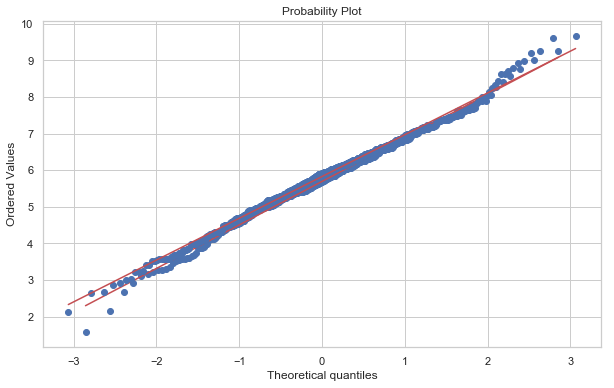

In [171]:
# Visualizing Distribution:
stats.probplot(df_log_revenue_2013_q1.LogTotalRev, plot = plt),
stats.probplot(df_log_revenue_2014_q1.LogTotalRev, plot = plt),

plt.show()

In [172]:
# Performing a one-tailed t-test by diving pval by 2:
stats.ttest_ind(df_log_revenue_2014_q1.LogTotalRev, df_log_revenue_2013_q1.LogTotalRev)

Ttest_indResult(statistic=1.7014366592724246, pvalue=0.0891875503870743)

In [173]:
pvalue= 0.0891875503870743/2
print(pvalue)
pvalue < .05

0.04459377519353715


True

**4.5.1 Is Average Q1 Order Revenue for 2014 significantly greater than Average Q1 Order Revenue from 2013?**
* $H_{0}:$ Average Order Revenue for Q1 2014 is not greater than that of 2013.
<br>
* $H_{a}:$ Average Order Revenue for Q1 2014 is greater than that of 2013.
<br>
* $\alpha$ = 0.05

The p-value = 0.04. Because our p-value < 0.05, we reject the null hypothesis that Average Order Revenue for Q1 2014 is not greater than that of 2013.

With this data, we're able to share the good news with confidence, not only have Northwind's number of Orders doubled in a YoY comparison between 2013 and 2014, but the average Order Revenue has also increased by a stastically significant amount.

# Recommendations

**1. Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?**

Discounts do have a statistically significant effect on the number of products customers order. 

```
Multiple Comparison of Means - Tukey HSD,FWER=0.05
=============================================
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 0.0    0.05   6.2955   2.0814 10.5097  True 
 0.0    0.1    3.5217  -0.8187  7.8622 False 
 0.0    0.15   6.6669   2.1352 11.1986  True 
 0.0    0.2    5.3096   0.8285  9.7907  True 
 0.0    0.25   6.525    1.954   11.096  True 
 0.05   0.1   -2.7738  -8.4504  2.9028 False 
 0.05   0.15   0.3714  -5.4528  6.1955 False 
 0.05   0.2    -0.986  -6.7708  4.7989 False 
 0.05   0.25   0.2294  -5.6253  6.0842 False 
 0.1    0.15   3.1452   -2.771  9.0613 False 
 0.1    0.2    1.7879  -4.0896  7.6653 False 
 0.1    0.25   3.0033   -2.943  8.9496 False 
 0.15   0.2   -1.3573  -7.3775  4.6628 False 
 0.15   0.25  -0.1419  -6.2292  5.9454 False 
 0.2    0.25   1.2154  -4.8343  7.2652 False 
---------------------------------------------
```
Based on the results of the Tukey test above, we concluded that there is a significant difference in the number of products that customers order between the control (no discount) and all levels of discount except for 0.10. However, we also found no significant difference between order quantity within varying discount levels. Based on these results, we might consider advising Northwind to offer lower discount levels, as increasing discount level does not significantly increase order size.

In a future experiment, we would want to factor profit margin into this calculation to maximize net revenue based on our results.

**2. Do discounts have a statistically significant effect on customer spend per order? If so, at what level(s) of discount?**

At a cursory glance, we can determine that Northwind generates more total revenue from sales of non-discounted items. However, the average order cost for orders containing discounts is greater than those without discounts. 

Hypothesis testing found the p-value to be slightly greater than our alpha value of 0.05 and we failed to reject the null hypothesis that revenue from orders containing discounts would be significantly different from orders not containing discounts.

To investigate further, we compared order revenue across all discount levels.

```
Multiple Comparison of Means - Tukey HSD,FWER=0.05
=============================================
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 0.0    0.05   0.5477   0.1455  0.9499  True 
 0.0    0.1   -0.0004  -0.4412  0.4403 False 
 0.0    0.15   0.0394  -0.3761  0.455  False 
 0.0    0.2   -0.0243   -0.455  0.4064 False 
 0.0    0.25   0.0996  -0.3447  0.5438 False 
 0.05   0.1   -0.5481  -1.1118  0.0156 False 
 0.05   0.15  -0.5082  -1.0525  0.036  False 
 0.05   0.2    -0.572  -1.1278 -0.0161  True 
 0.05   0.25  -0.4481  -1.0146  0.1183 False 
 0.1    0.15   0.0399  -0.5335  0.6132 False 
 0.1    0.2   -0.0239  -0.6083  0.5605 False 
 0.1    0.25    0.1    -0.4945  0.6944 False 
 0.15   0.2   -0.0637  -0.6294  0.5019 False 
 0.15   0.25   0.0601  -0.5159  0.6362 False 
 0.2    0.25   0.1239  -0.4632  0.7109 False 
---------------------------------------------
```

Interestingly, these results show that there is only a statistically significant difference in order revenue between discounts levels of:

* 0.00 and 0.05
* 0.05 and 0.20

Based on these results, we might advise Northwind to reduce discount levels to 0.05 for most products. In a future experiment, we could determine the effect of discount level on an individual product level in order to maximize net revenue.

**3. Do discounts have a statistically significant effect on Order Quantity by Category? **

Based on our results, we were able to determine that discount does have a significant effect on order quantity on the level of product category, but were not able to determine a significant difference between categories. While not insignificant, to obtain greater value from this inquiry, we would recommend performing hypothesis testing for each individual product category at varying discount levels instead of combining the results as seen above.

**4. Is there a statistically significant difference in performance of Sales Employees at Northwind?**

We did not observe a statistically significant difference in performance of the 9 Northwind Sales Teammembers **as measured by sales volume**.

However, it is worth noting that within the dataset, there are 3 distinct seniority levels:

* Sales Rep
* Manager
* VP

As we don't have access to department/individual KPIs or have a clear understanding of the other responsibilities these employees might have, we should re-evaluate our results after getting additional context from Northwind's leadership.

**5. Is Q1 Order Revenue for 2014 significantly greater than Q1 Order Revenue from 2013?**

Yes, through our analysis we were able to observe a significant difference in both order quantity and revenue between the first quarter revenue of 2013 and 2014.

To build on the results of this investigation, we would recommend that Northwind assess its historical growth rate and make data-driven projections for 2014 YTD revenue.

## Additional Future Experiments:

In addition to the recommendations above, we would advise Northwind to investigate sales perfomance by region as well as measuring supply chain efficiency by recording and comparing shipping/supply from Northwind's various shippers and suppliers.